In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from  scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

In [3]:

df = pd.read_csv('clean.csv')

In [4]:
data = df.drop('Unnamed: 0',axis =1)

In [5]:
data.head()

,bearer_id,start,start_ms,end,end_ms,imsi,msisdn_number,imei,last_location_name,avg_rtt_dl__ms_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,54.448072,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,54.448072,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,54.448072,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 54 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 150001 non-null  object 
 1   start                                     150001 non-null  object 
 2   start_ms                                  150001 non-null  float64
 3   end                                       150001 non-null  object 
 4   end_ms                                    150001 non-null  float64
 5   imsi                                      150001 non-null  float64
 6   msisdn_number                             150001 non-null  float64
 7   imei                                      150001 non-null  float64
 8   last_location_name                        150001 non-null  object 
 9   avg_rtt_dl__ms_                           150001 non-null  float64
 10  avg_rtt_ul__ms_     

# Task 2 - User Engagement Analysis

objective:expected to track the user’s engagement using the following engagement metrics: 
●	sessions frequency 
●	the duration of the session 
●	the session total traffic (download and upload (bytes))


In [7]:
# Convert start and end timestamps to datetime objects
data['start'] = pd.to_datetime(data['start'])
data['end'] = pd.to_datetime(data['end'])
    

# session frequency

In [8]:
# calculate the session freqquency:

session_frequency = data.groupby('msisdn_number')['bearer_id'].count().reset_index(name='session_frequency').sort_values('session_frequency',ascending=False)
session_frequency

,msisdn_number,session_frequency
13526,3.362632e+10,1084
13180,3.362578e+10,17
6437,3.361489e+10,17
37052,3.365973e+10,16
92923,3.376054e+10,15
...,...,...
41061,3.366068e+10,1
41059,3.366068e+10,1
41058,3.366067e+10,1
41057,3.366067e+10,1


# Session duration

In [9]:
sess_dur = data.groupby('msisdn_number')['dur___ms__1'].sum().reset_index(name='session_dur_hr').sort_values('session_dur_hr', ascending = False)

In [10]:
sess_dur

,msisdn_number,session_dur_hr
13526,3.362632e+10,6.688563e+10
37052,3.365973e+10,2.087582e+09
6437,3.361489e+10,1.933339e+09
76363,3.367588e+10,1.927235e+09
13180,3.362578e+10,1.890414e+09
...,...,...
24741,3.365043e+10,7.267018e+06
85146,3.369839e+10,7.258080e+06
35287,3.365933e+10,7.189000e+06
60767,3.366566e+10,7.146574e+06


In [11]:
sess_dur['session_dur_hr']=sess_dur['session_dur_hr'].apply(lambda x: int(x/(1000*60*60)%24))

In [12]:
sess_dur

,msisdn_number,session_dur_hr
13526,3.362632e+10,3
37052,3.365973e+10,3
6437,3.361489e+10,9
76363,3.367588e+10,7
13180,3.362578e+10,21
...,...,...
24741,3.365043e+10,2
85146,3.369839e+10,2
35287,3.365933e+10,1
60767,3.366566e+10,1


# Total traffic:

In [13]:
data['total_traffic'] = data['total_dl__bytes_']+data['total_ul__bytes_']

In [14]:
data['total_traffic']

0         3.456294e+08
1         7.071854e+08
2         3.076910e+08
3         8.893527e+08
4         6.076814e+08
              ...     
149996    6.318041e+08
149997    7.057839e+08
149998    6.276986e+08
149999    4.015220e+08
150000    4.957631e+08
Name: total_traffic, Length: 150001, dtype: float64

In [15]:
sess_trfc = data.groupby('msisdn_number')['total_traffic'].sum().reset_index(name='session_trfc').sort_values('session_trfc', ascending = False)

In [16]:
sess_trfc

,msisdn_number,session_trfc
13526,3.362632e+10,5.397493e+11
6437,3.361489e+10,8.846226e+09
92923,3.376054e+10,8.514774e+09
13180,3.362578e+10,8.499621e+09
76363,3.367588e+10,7.891111e+09
...,...,...
76161,3.367548e+10,3.802236e+07
104769,3.378251e+10,3.792924e+07
63657,3.366668e+10,3.399962e+07
43677,3.366132e+10,3.357584e+07


In [17]:
sess_trfc['session_trfc_mb'] = (sess_trfc['session_trfc'] / 1024) / 1024
session_trfc = sess_trfc.drop('session_trfc',axis=1)
session_trfc


,msisdn_number,session_trfc_mb
13526,3.362632e+10,514745.010179
6437,3.361489e+10,8436.419004
92923,3.376054e+10,8120.321239
13180,3.362578e+10,8105.869982
76363,3.367588e+10,7525.549515
...,...,...
76161,3.367548e+10,36.260945
104769,3.378251e+10,36.172143
63657,3.366668e+10,32.424568
43677,3.366132e+10,32.020416


In [18]:
aggregate_metrics  = sess_dur.merge(session_frequency,on='msisdn_number').merge(session_trfc, on='msisdn_number')

In [19]:
aggregate_metrics

,msisdn_number,session_dur_hr,session_frequency,session_trfc_mb
0,3.362632e+10,3,1084,514745.010179
1,3.365973e+10,3,16,7348.883422
2,3.361489e+10,9,17,8436.419004
3,3.367588e+10,7,15,7525.549515
4,3.362578e+10,21,17,8105.869982
...,...,...,...,...
106851,3.365043e+10,2,1,199.216558
106852,3.369839e+10,2,1,797.900773
106853,3.365933e+10,1,1,266.842393
106854,3.366566e+10,1,1,647.084608


# ●	Aggregate the above metrics per customer ID (MSISDN) and report the top 10 customers per engagement metric 

In [20]:
# Group by 'msisdn_number' and calculate aggregated metrics
aggregated_metrics = aggregate_metrics.groupby('msisdn_number').agg(
    session_dur_hr=('session_dur_hr', 'sum'),
    session_frequency=('session_frequency', 'sum'),
    session_trfc_mb=('session_trfc_mb', 'sum')
)

# - Top 10 customers per session duration 

In [21]:
top_10_session_dur = aggregated_metrics.sort_values(by='session_dur_hr', ascending=False).head(10)
top_10_session_dur

,session_dur_hr,session_frequency,session_trfc_mb
msisdn_number,,,
3.376225e+10,23,1,212.931516
3.368870e+10,23,1,643.041429
3.376264e+10,23,5,1741.244620
3.365930e+10,23,2,962.407598
3.366230e+10,23,1,527.711388
3.376264e+10,23,5,3111.782911
3.367191e+10,23,1,534.786179
3.367190e+10,23,1,78.044409
3.366230e+10,23,1,546.247715


**Finding: all the top-10 customer from session duration spends same time on data session**

In [22]:
sess_dur_counts = aggregated_metrics.session_dur_hr.value_counts().sort_values(ascending=False).reset_index(name='customer counts')
sess_dur_counts.rename(columns={"index":'hours'}, inplace=True)
sess_dur_counts

,hours,customer counts
0,23,17299
1,5,7614
2,0,6767
3,3,5019
4,4,4820
5,7,4303
6,8,4229
7,2,4071
8,6,4067
9,9,3963


**Finding: here we found that there are total-17299 customer who spends 23 hrs on data session**

# - Top 10 customers per session traffic

In [23]:
top_10_session_trfc_mb = aggregated_metrics.sort_values(by='session_trfc_mb', ascending=False).head(10)
top_10_session_trfc_mb

,session_dur_hr,session_frequency,session_trfc_mb
msisdn_number,,,
3.362632e+10,3,1084,514745.010179
3.361489e+10,9,17,8436.419004
3.376054e+10,10,15,8120.321239
3.362578e+10,21,17,8105.869982
3.367588e+10,7,15,7525.549515
3.365973e+10,3,16,7348.883422
3.366646e+10,10,11,6969.929636
3.376041e+10,8,12,6801.958574
3.366471e+10,18,11,6584.133433


**from  here we can see that customer having msisdn number '3.362632e+10' has an outsized (outlier) positive difference from the average session traffic of the top ten.**

In [24]:
# to know why let draw a correlation between session frequency and sessio  traffic

trfc_frq = aggregated_metrics[['session_frequency','session_trfc_mb']]
trfc_frq.sort_values(by='session_trfc_mb',ascending=False)

,session_frequency,session_trfc_mb
msisdn_number,,
3.362632e+10,1084,514745.010179
3.361489e+10,17,8436.419004
3.376054e+10,15,8120.321239
3.362578e+10,17,8105.869982
3.367588e+10,15,7525.549515
...,...,...
3.367548e+10,1,36.260945
3.378251e+10,1,36.172143
3.366668e+10,1,32.424568


In [25]:
trfc_frq_corr = trfc_frq.corr()
trfc_frq_corr.iloc[1,0]

0.9857997807604783

**Here we can see that there is a strong positive correlation between session frequency and session trfc**

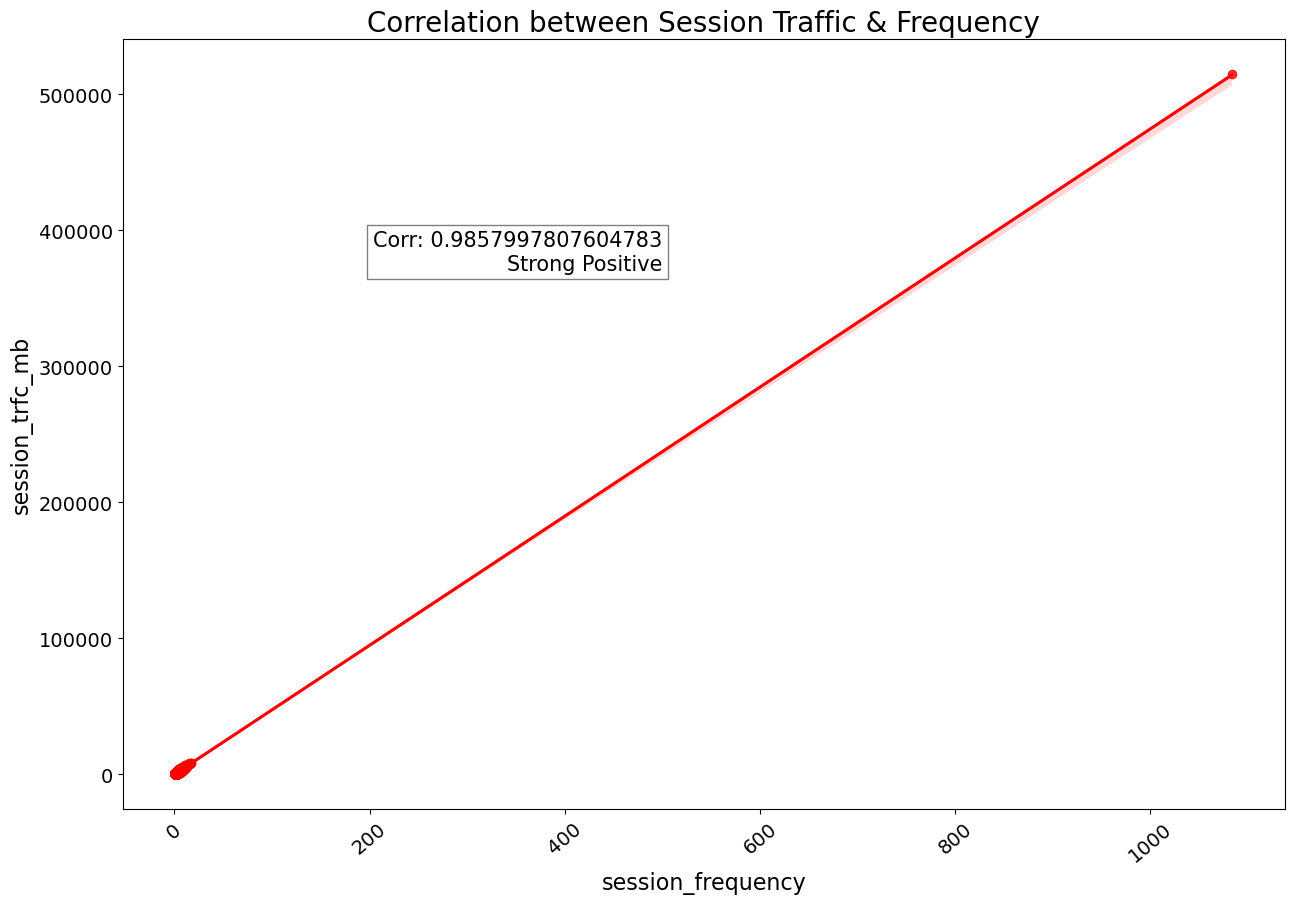

In [26]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Session Frequency', fontsize=16)
plt.ylabel('Session Traffic', fontsize=16)
plt.title('Correlation between Session Traffic & Frequency', fontsize=20)
sns.regplot(data=trfc_frq, y='session_trfc_mb', x='session_frequency', scatter=True, color='r')
plt.text(500, 400000, s= f'Corr: {trfc_frq_corr.iloc[1,0]}\nStrong Positive', fontsize=15,
         horizontalalignment='right',
         bbox=dict(facecolor='w', alpha=0.5),
         verticalalignment='top')
plt.show()

In [27]:
#plotting correlation matrix for all metrics

agg_metrics_corr = aggregated_metrics.corr()
agg_metrics_corr

,session_dur_hr,session_frequency,session_trfc_mb
session_dur_hr,1.000000,0.011511,0.011399
session_frequency,0.011511,1.000000,0.985800
session_trfc_mb,0.011399,0.985800,1.000000


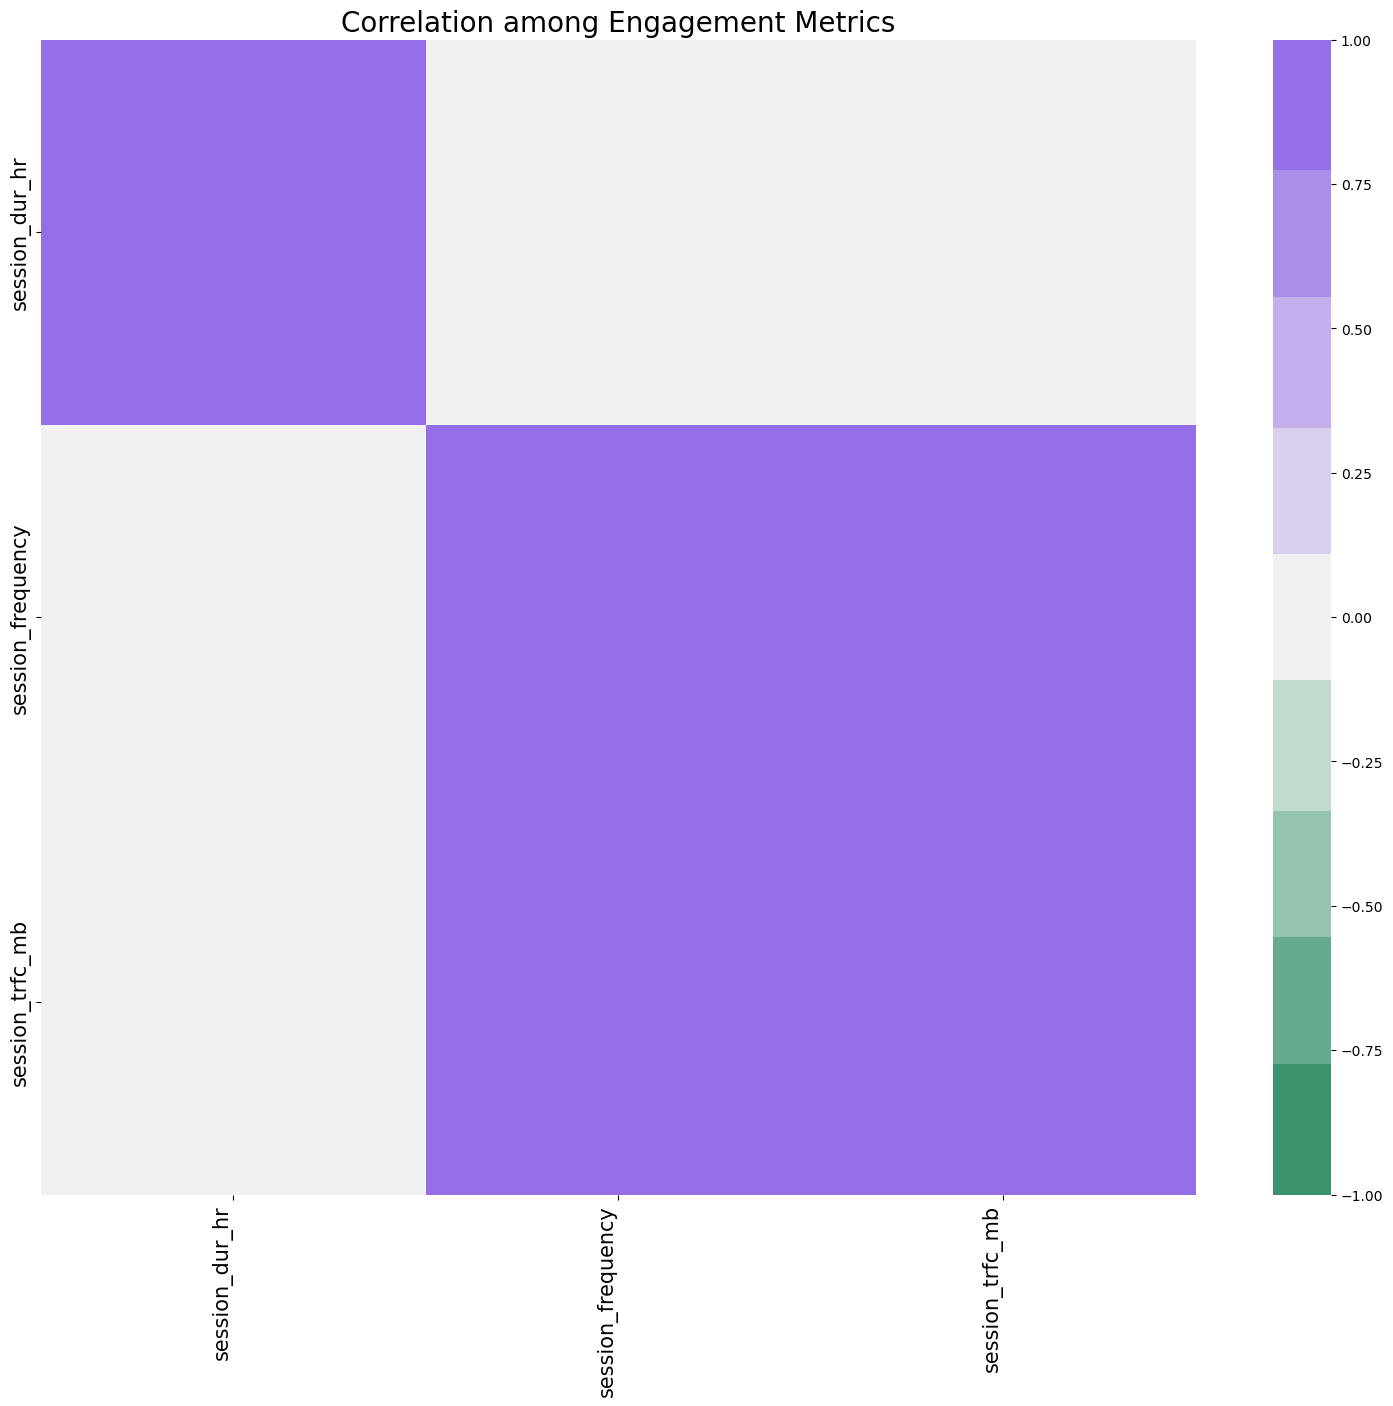

In [28]:
plt.subplots(figsize=(20, 15))
plt.title('Correlation among Engagement Metrics', fontsize=20)
ax = sns.heatmap(
    agg_metrics_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

>**Finding: from here we can conclude that as the session frequnecy increases, session traffic also increases**

# ●	Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [59]:
columns = ['bearer_id', 'msisdn_number',
           'http_dl__bytes_', 'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'dur___ms__1', 
          'social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_',
       'gaming_ul__bytes_', 'other_dl__bytes_', 'other_ul__bytes_',
       'total_ul__bytes_', 'total_dl__bytes_']

In [60]:
df_new = data[columns]

In [89]:
apps = pd.DataFrame()

In [90]:
apps['bearer_id'] = df_new['bearer_id']
apps['msisdn_number'] = df_new['msisdn_number']
apps['social_media(mb)'] = round(((df_new.social_media_dl__bytes_ + df_new.social_media_ul__bytes_)/1024)/1024,4)
apps['google(mb)'] = round(((df_new.google_dl__bytes_ + df_new.google_ul__bytes_)/1024)/1024,4)
apps['email(mb)'] = round(((df_new.email_dl__bytes_ + df_new.email_ul__bytes_)/1024)/1024,4)
apps['youtube(mb)'] = round(((df_new.youtube_dl__bytes_ + df_new.youtube_ul__bytes_)/1024)/1024,4)
apps['netflix(mb)'] = round(((df_new.netflix_dl__bytes_ + df_new.netflix_ul__bytes_)/1024)/1024,4)
apps['gaming(mb)'] = round(((df_new.gaming_dl__bytes_ + df_new.gaming_ul__bytes_)/1024)/1024,4)
apps['other(mb)'] = round(((df_new.other_dl__bytes_ + df_new.other_ul__bytes_)/1024)/1024,4) 
apps['total_traffic(mb)'] = round(((df_new.total_traffic_bytes)/1024)/1024,4)
# convert duration from millisecond to hour
apps['duration (hrs)'] = round(((df_new.dur___ms__1)/1024)/1024,4)

In [91]:
apps

,bearer_id,msisdn_number,social_media(mb),google(mb),email(mb),youtube(mb),netflix(mb),gaming(mb),other(mb),total_traffic(mb),duration (hrs)
0,13114483460844900352,33664962239.0,1.4974,2.7713,3.5298,17.5056,17.0280,278.8796,172.1943,329.6179,99.7630
1,13114483482878900224,33681854413.0,1.8437,4.2096,0.8940,37.5358,33.9179,581.6658,516.8527,674.4245,99.7630
2,13114483484080500736,33760627129.0,1.6463,9.7552,3.2073,32.8305,22.6509,219.3263,395.6874,293.4370,99.7630
3,13114483485442799616,33750343200.0,0.6270,11.2646,1.9750,34.8423,14.3934,772.8461,726.5446,848.1529,99.7630
4,13114483499480700928,33699795932.0,0.8705,7.3899,2.0126,32.6369,16.7273,506.6271,538.4634,579.5301,99.7630
...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,33650688697.0,3.3541,12.1926,0.6589,26.6601,35.8218,510.9853,15.9759,602.5354,77.4677
149997,7349883264234609664,33663449963.0,2.2432,4.2108,2.0234,21.1387,38.7605,602.3675,681.5320,673.0880,93.4321
149998,13114483573367300096,33621890103.0,1.2019,6.2804,1.9629,23.3807,14.3334,540.6702,126.2813,598.6201,93.6981
149999,13114483573367300096,33619622058.0,0.7850,7.3979,2.7188,16.3293,15.7307,338.6178,778.3127,382.9212,93.3749


In [92]:
social_media_users = apps.groupby('msisdn_number')['social_media(mb)'].sum().reset_index(name='social_traffic')
social_media_users = social_media_users.merge(agg_metrics, on='msisdn_number').sort_values(by='social_traffic', ascending=False)

In [94]:
top10_socialMedia_users = social_media_users.head(10)
top10_socialMedia_users

,msisdn_number,social_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,1923.7432,3,1084,514745.0102
92923,3.376054e+10,37.9404,10,15,8120.3212
37052,3.365973e+10,33.7715,3,16,7348.8834
6437,3.361489e+10,26.9837,9,17,8436.4190
13180,3.362578e+10,25.8784,21,17,8105.8700
65118,3.366716e+10,23.1245,12,13,5358.1181
106137,3.378632e+10,22.8642,5,12,5361.7778
70960,3.366907e+10,22.6981,1,11,3725.5690
666,3.360313e+10,22.0088,3,12,4745.6694
31331,3.365849e+10,21.9346,17,9,2565.5164


In [95]:
# Since there are some outliers so let normalize the data by log nirmalization

top10_socialMedia_users.social_traffic = np.log(top10_socialMedia_users.social_traffic)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1708\1991400995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_socialMedia_users.social_traffic = np.log(top10_socialMedia_users.social_traffic)


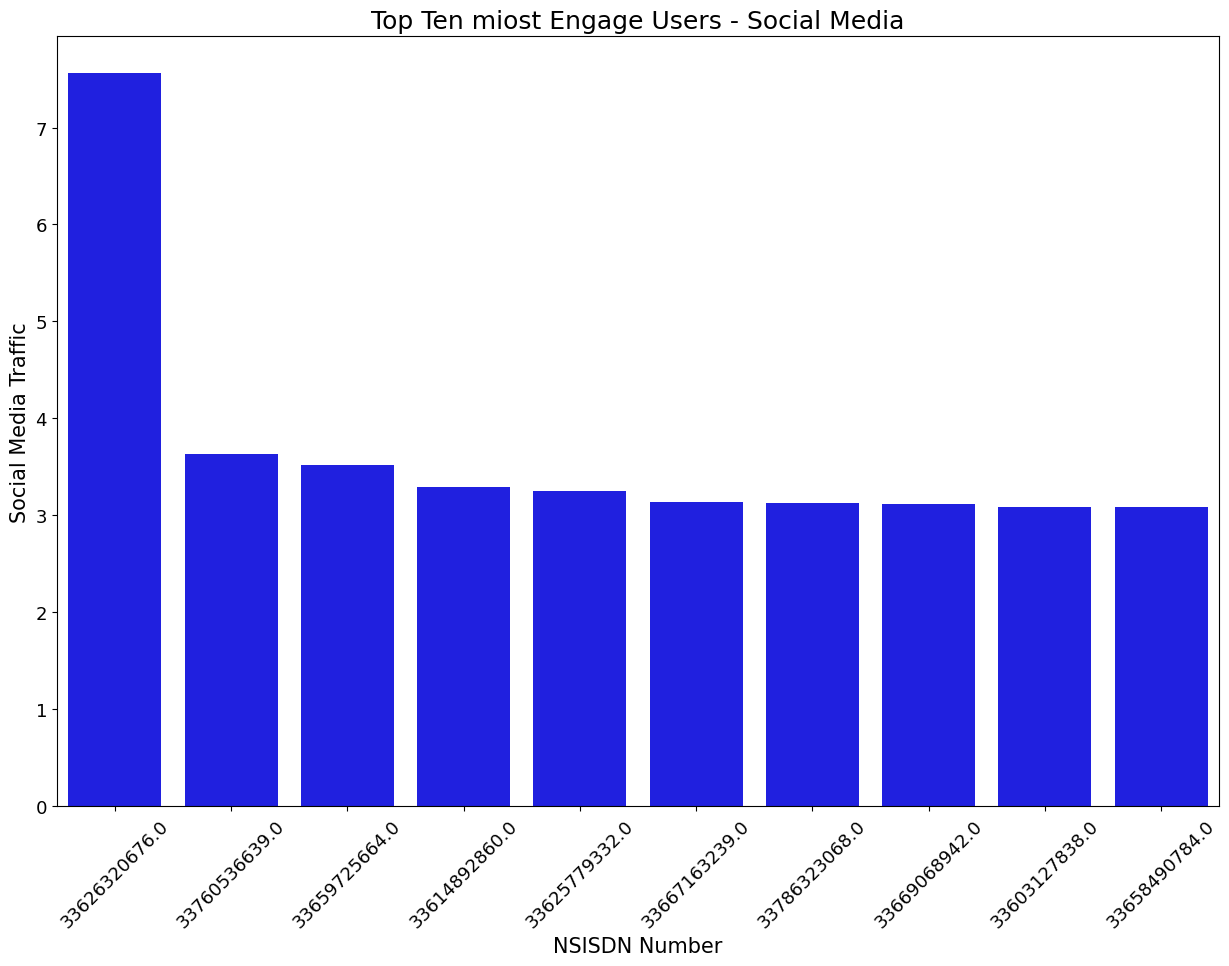

In [96]:
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_socialMedia_users, x='msisdn_number', y='social_traffic', color='b',
           order=top10_socialMedia_users.msisdn_number.values.tolist())
plt.title("Top Ten miost Engage Users - Social Media", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Social Media Traffic', fontsize=15)
plt.show()

In [97]:
social_media_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=social_media_users.head(10))

In [98]:
social_media_agg.value = np.log(social_media_agg.value)

In [99]:
social_media_agg = social_media_agg.sort_values(by='msisdn_number')
social_media_agg.rename(columns={'value':'value(log)'}, inplace=True)
social_media_agg

,msisdn_number,metrics,value(log)
18,3.360313e+10,session_fre,2.484907
28,3.360313e+10,session_trfc,8.464988
8,3.360313e+10,session_dur_hours,1.098612
23,3.361489e+10,session_trfc,9.040313
3,3.361489e+10,session_dur_hours,2.197225
13,3.361489e+10,session_fre,2.833213
14,3.362578e+10,session_fre,2.833213
24,3.362578e+10,session_trfc,9.000344
4,3.362578e+10,session_dur_hours,3.044522
20,3.362632e+10,session_trfc,13.151427


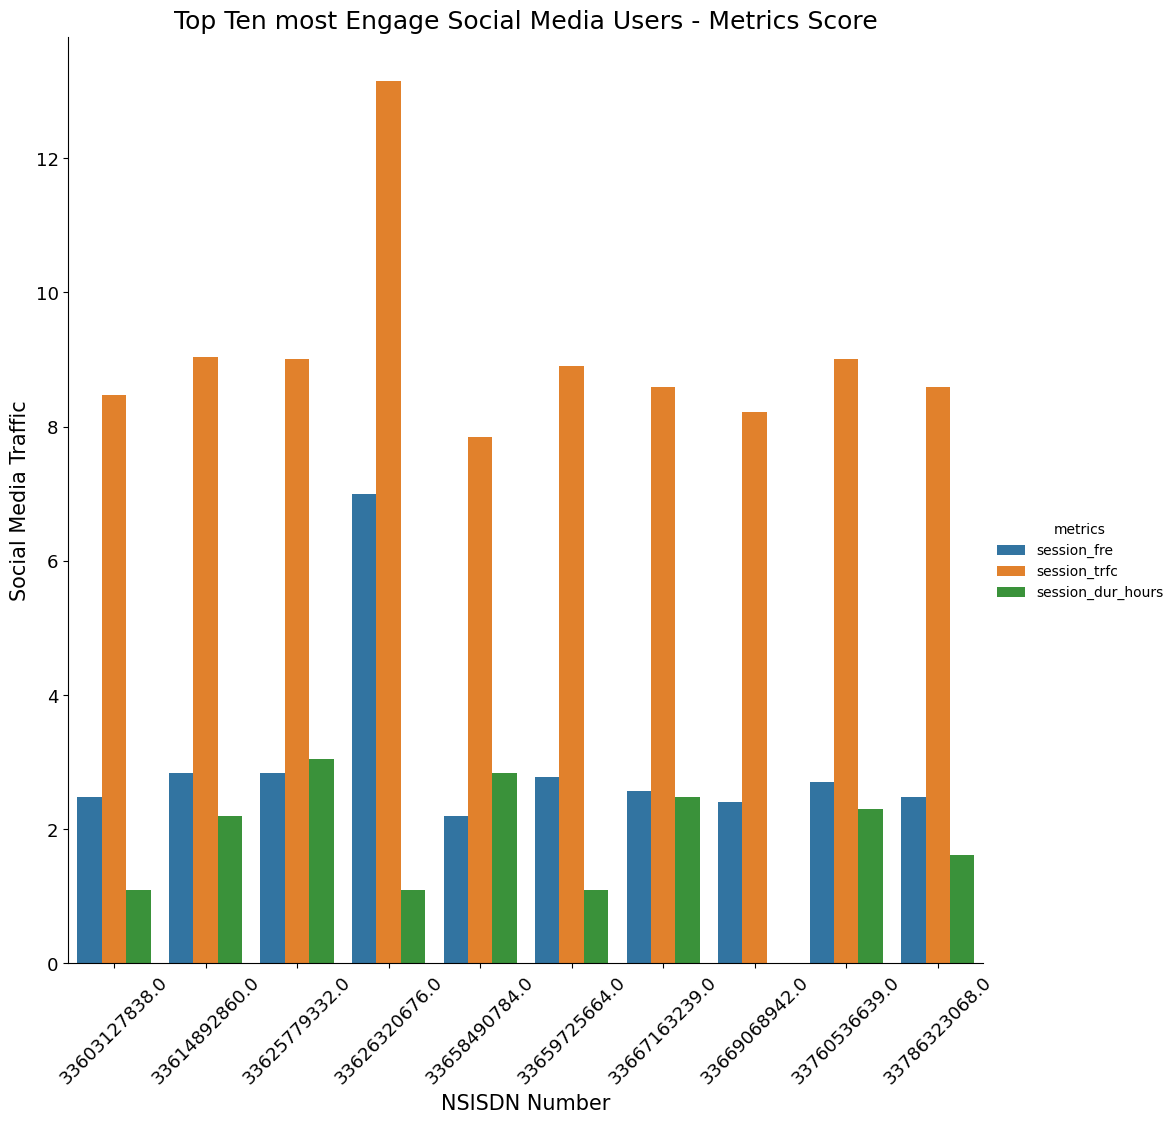

In [100]:
sns.catplot(data=social_media_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar',
    aspect=1,)
plt.title("Top Ten most Engage Social Media Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Social Media Traffic', fontsize=15)
plt.show()

> From the above, we can observe that there is high session traffic engagement among the top ten social media users compared to other enagagement metric

In [ ]:
> Google

In [114]:
google_users = apps.groupby('msisdn_number')['google(mb)'].sum().reset_index(name='google_traffic')
google_users


,msisdn_number,google_traffic
0,3.360100e+10,4.1857
1,3.360100e+10,5.0877
2,3.360100e+10,3.2836
3,3.360101e+10,9.2301
4,3.360101e+10,17.6426
...,...,...
106851,3.379000e+10,7.1824
106852,3.379000e+10,5.1782
106853,3.197021e+12,9.9551
106854,3.370000e+14,9.3752


> merge aggregation metrics

In [115]:
google_users = google_users.merge(agg_metrics, on='msisdn_number').sort_values(by='google_traffic', ascending=False)
google_users.head(10)

,msisdn_number,google_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,8011.5972,3,1084,514745.0102
13180,3.362578e+10,135.7155,21,17,8105.8700
6437,3.361489e+10,122.0453,9,17,8436.4190
92923,3.376054e+10,117.5150,10,15,8120.3212
37052,3.365973e+10,111.1187,3,16,7348.8834
106137,3.378632e+10,105.1470,5,12,5361.7778
76363,3.367588e+10,104.7710,7,15,7525.5495
65118,3.366716e+10,100.1669,12,13,5358.1181
94654,3.376127e+10,92.5924,6,10,4817.1181
86313,3.369876e+10,87.6762,13,10,5600.2259


In [118]:
top10_google_users = google_users.head(10)
top10_google_users

,msisdn_number,google_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,8011.5972,3,1084,514745.0102
13180,3.362578e+10,135.7155,21,17,8105.8700
6437,3.361489e+10,122.0453,9,17,8436.4190
92923,3.376054e+10,117.5150,10,15,8120.3212
37052,3.365973e+10,111.1187,3,16,7348.8834
106137,3.378632e+10,105.1470,5,12,5361.7778
76363,3.367588e+10,104.7710,7,15,7525.5495
65118,3.366716e+10,100.1669,12,13,5358.1181
94654,3.376127e+10,92.5924,6,10,4817.1181
86313,3.369876e+10,87.6762,13,10,5600.2259


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1708\764134807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_google_users.google_traffic = np.log(top10_google_users.google_traffic)


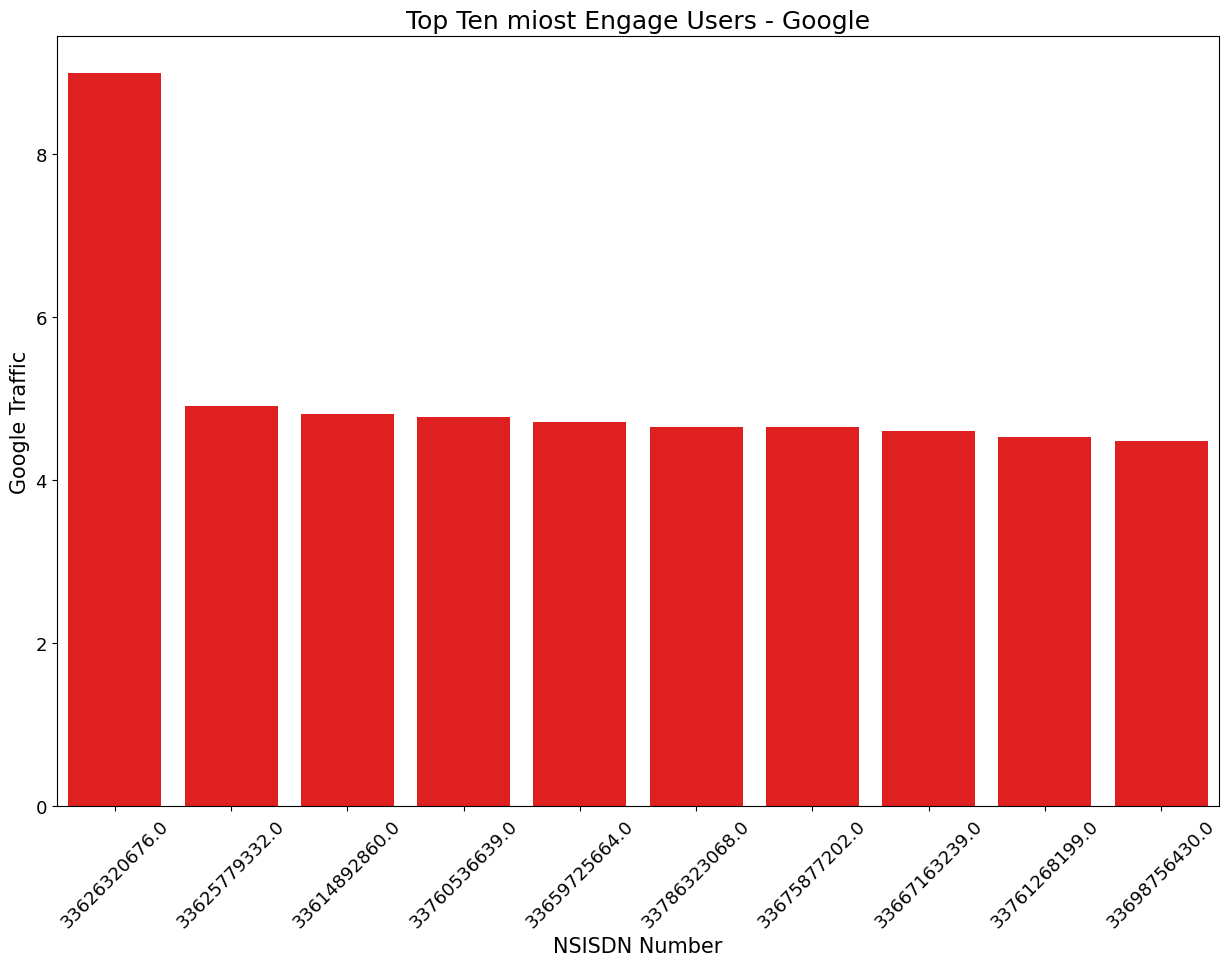

In [119]:
top10_google_users.google_traffic = np.log(top10_google_users.google_traffic)
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_google_users, x='msisdn_number', y='google_traffic', color='r', 
            order=top10_google_users.msisdn_number.values.tolist())
plt.title("Top Ten miost Engage Users - Google", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Google Traffic', fontsize=15)
plt.show()

In [120]:
google_users

,msisdn_number,google_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,8011.5972,3,1084,514745.0102
13180,3.362578e+10,135.7155,21,17,8105.8700
6437,3.361489e+10,122.0453,9,17,8436.4190
92923,3.376054e+10,117.5150,10,15,8120.3212
37052,3.365973e+10,111.1187,3,16,7348.8834
...,...,...,...,...,...
94765,3.376132e+10,0.1075,7,1,219.7156
72306,3.366953e+10,0.1074,12,1,212.6710
75413,3.367409e+10,0.0952,17,1,264.0004
84066,3.369800e+10,0.0857,22,1,396.7003


In [122]:
google_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=google_users.head(10))
google_agg

,msisdn_number,metrics,value
0,3.362632e+10,session_dur_hours,3.0000
1,3.362578e+10,session_dur_hours,21.0000
2,3.361489e+10,session_dur_hours,9.0000
3,3.376054e+10,session_dur_hours,10.0000
4,3.365973e+10,session_dur_hours,3.0000
5,3.378632e+10,session_dur_hours,5.0000
6,3.367588e+10,session_dur_hours,7.0000
7,3.366716e+10,session_dur_hours,12.0000
8,3.376127e+10,session_dur_hours,6.0000
9,3.369876e+10,session_dur_hours,13.0000


In [123]:
google_agg.value = np.log(google_agg.value) # normalising outliers using log

In [124]:
google_agg = google_agg.sort_values(by='msisdn_number')

In [125]:
google_agg.rename(columns={'value':'value(log)'}, inplace=True)

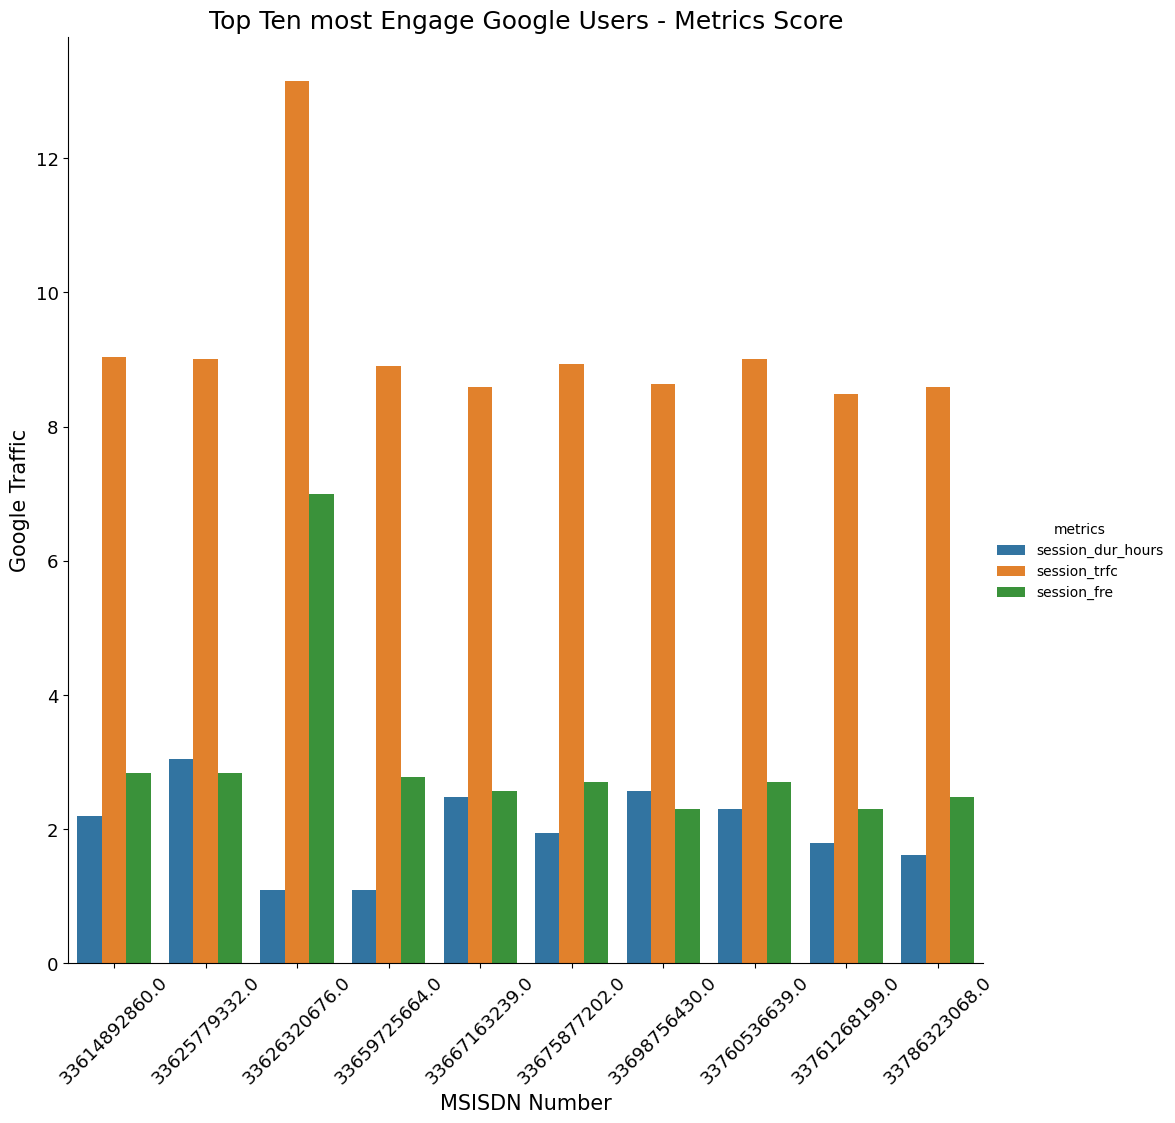

In [126]:
sns.catplot(data=google_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar', 
    aspect=1,)
plt.title("Top Ten most Engage Google Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Google Traffic', fontsize=15)
plt.show()

> From the above, we can observe that there is high session traffic engagement among the top ten of this appplication users compared to other enagagement metric

**Email**

In [127]:
email_users = apps.groupby('msisdn_number')['email(mb)'].sum().reset_index(name='email_traffic')
email_users

,msisdn_number,email_traffic
0,3.360100e+10,1.2697
1,3.360100e+10,3.1545
2,3.360100e+10,3.0569
3,3.360101e+10,2.1788
4,3.360101e+10,3.1523
...,...,...
106851,3.379000e+10,0.9603
106852,3.379000e+10,2.3976
106853,3.197021e+12,1.4503
106854,3.370000e+14,3.1648


In [128]:
email_users = email_users.merge(agg_metrics, on='msisdn_number').sort_values(by='email_traffic', ascending=False)
email_users.head(10)

,msisdn_number,email_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,2329.1592,3,1084,514745.0102
6437,3.361489e+10,38.8990,9,17,8436.4190
13180,3.362578e+10,38.7515,21,17,8105.8700
106137,3.378632e+10,34.6280,5,12,5361.7778
37052,3.365973e+10,34.3320,3,16,7348.8834
92923,3.376054e+10,32.1329,10,15,8120.3212
76363,3.367588e+10,30.0544,7,15,7525.5495
60087,3.366546e+10,29.0088,10,9,5138.9987
65118,3.366716e+10,28.9304,12,13,5358.1181
86455,3.369879e+10,27.7128,6,11,6237.8875


In [129]:
top10_email_users = email_users.head(10)

In [130]:
top10_email_users.email_traffic = np.log(top10_email_users.email_traffic)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1708\3575010985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_email_users.email_traffic = np.log(top10_email_users.email_traffic)


In [131]:
top10_email_users

,msisdn_number,email_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,7.753263,3,1084,514745.0102
6437,3.361489e+10,3.660969,9,17,8436.4190
13180,3.362578e+10,3.657169,21,17,8105.8700
106137,3.378632e+10,3.544663,5,12,5361.7778
37052,3.365973e+10,3.536078,3,16,7348.8834
92923,3.376054e+10,3.469880,10,15,8120.3212
76363,3.367588e+10,3.403009,7,15,7525.5495
60087,3.366546e+10,3.367599,10,9,5138.9987
65118,3.366716e+10,3.364893,12,13,5358.1181
86455,3.369879e+10,3.321894,6,11,6237.8875


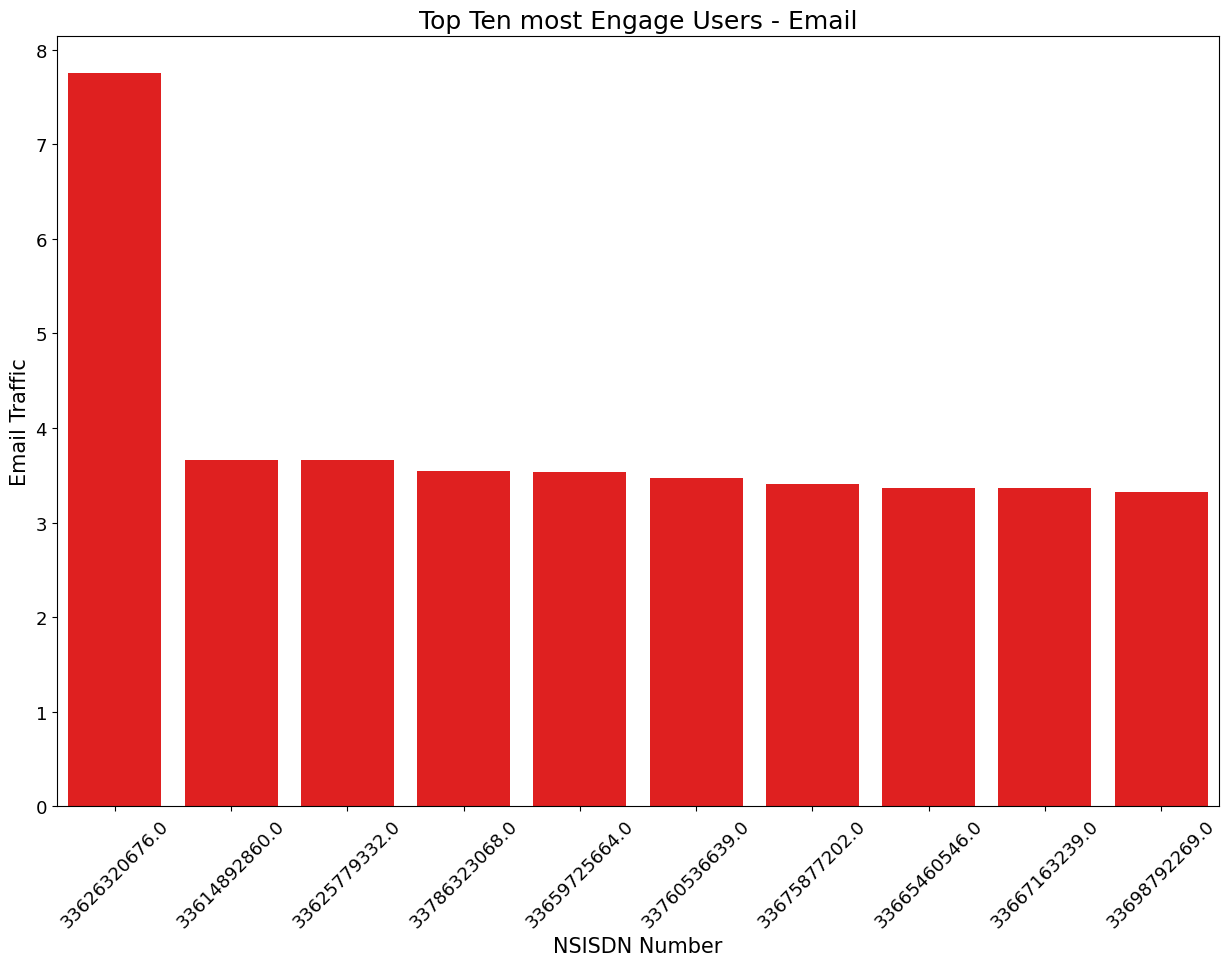

In [132]:
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_email_users, x='msisdn_number', y='email_traffic', color='r', 
            order=top10_email_users.msisdn_number.values.tolist())
plt.title("Top Ten most Engage Users - Email", fontsize=18)
plt.xticks(fontsize=13, rotation = 45) 
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Email Traffic', fontsize=15)
plt.show()

In [133]:
email_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=google_users.head(10))
email_agg

,msisdn_number,metrics,value
0,3.362632e+10,session_dur_hours,3.0000
1,3.362578e+10,session_dur_hours,21.0000
2,3.361489e+10,session_dur_hours,9.0000
3,3.376054e+10,session_dur_hours,10.0000
4,3.365973e+10,session_dur_hours,3.0000
5,3.378632e+10,session_dur_hours,5.0000
6,3.367588e+10,session_dur_hours,7.0000
7,3.366716e+10,session_dur_hours,12.0000
8,3.376127e+10,session_dur_hours,6.0000
9,3.369876e+10,session_dur_hours,13.0000


In [134]:
email_agg.value = np.log(email_agg.value)
email_agg = email_agg.sort_values(by='msisdn_number')
email_agg.rename(columns={'value':'value(log)'}, inplace=True)

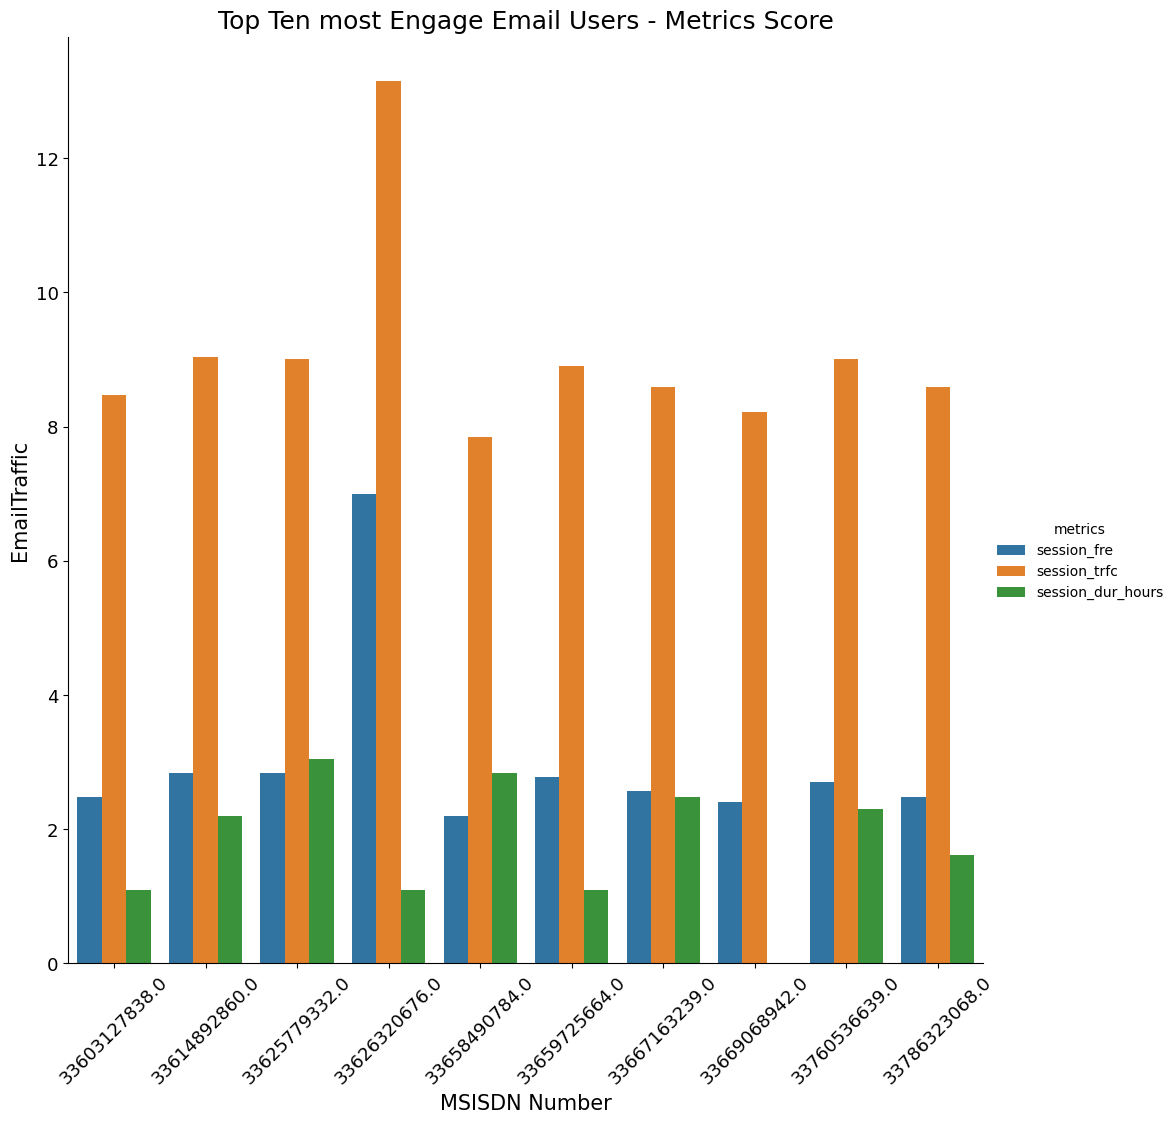

In [135]:
sns.catplot(data=social_media_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar', 
    aspect=1,)
plt.title("Top Ten most Engage Email Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('EmailTraffic', fontsize=15)
plt.show()

> From the above, we can observe that there is high session traffic in this application compared to other enagagement metric

**Youtube**

In [136]:
youtube_users = apps.groupby('msisdn_number')['youtube(mb)'].sum().reset_index(name='youtube_traffic')
youtube_users

,msisdn_number,youtube_traffic
0,3.360100e+10,20.6228
1,3.360100e+10,11.8563
2,3.360100e+10,20.3453
3,3.360101e+10,6.6541
4,3.360101e+10,39.6090
...,...,...
106851,3.379000e+10,25.4134
106852,3.379000e+10,18.9319
106853,3.197021e+12,11.4059
106854,3.370000e+14,35.0332


In [137]:
youtube_users = youtube_users.merge(agg_metrics, on='msisdn_number').sort_values(by='youtube_traffic', ascending=False)
youtube_users.head(10)

,msisdn_number,youtube_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,23570.2609,3,1084,514745.0102
13180,3.362578e+10,431.9752,21,17,8105.8700
92923,3.376054e+10,377.9309,10,15,8120.3212
6437,3.361489e+10,376.1006,9,17,8436.4190
76363,3.367588e+10,302.7063,7,15,7525.5495
65118,3.366716e+10,300.6281,12,13,5358.1181
13994,3.362708e+10,294.4857,22,12,5488.1390
92577,3.376041e+10,289.1245,8,12,6801.9586
86455,3.369879e+10,288.6410,6,11,6237.8875
666,3.360313e+10,270.9294,3,12,4745.6694


In [138]:
top10_youtube_users = youtube_users.head(10)

In [139]:
top10_youtube_users.youtube_traffic = np.log(top10_youtube_users.youtube_traffic)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1708\223677919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_youtube_users.youtube_traffic = np.log(top10_youtube_users.youtube_traffic)


In [140]:
top10_youtube_users

,msisdn_number,youtube_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,10.067741,3,1084,514745.0102
13180,3.362578e+10,6.068368,21,17,8105.8700
92923,3.376054e+10,5.934711,10,15,8120.3212
6437,3.361489e+10,5.929857,9,17,8436.4190
76363,3.367588e+10,5.712763,7,15,7525.5495
65118,3.366716e+10,5.705874,12,13,5358.1181
13994,3.362708e+10,5.685230,22,12,5488.1390
92577,3.376041e+10,5.666857,8,12,6801.9586
86455,3.369879e+10,5.665184,6,11,6237.8875
666,3.360313e+10,5.601858,3,12,4745.6694


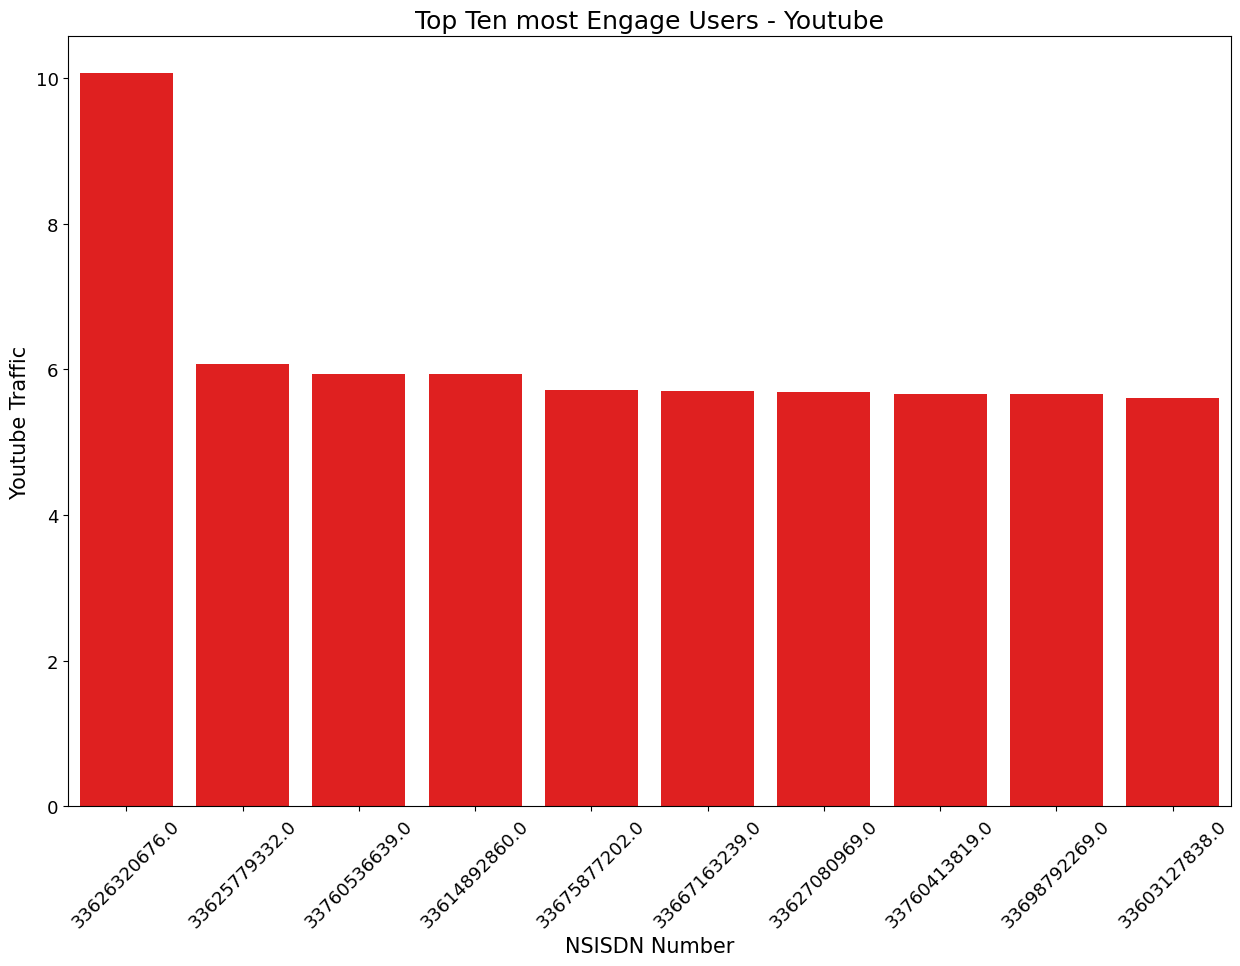

In [141]:
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_youtube_users, x='msisdn_number', y='youtube_traffic', color='r', 
            order=top10_youtube_users.msisdn_number.values.tolist())
plt.title("Top Ten most Engage Users - Youtube", fontsize=18)
plt.xticks(fontsize=13, rotation = 45) 
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Youtube Traffic', fontsize=15)
plt.show()

In [142]:
youtube_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=youtube_users.head(10))
youtube_agg

,msisdn_number,metrics,value
0,3.362632e+10,session_dur_hours,3.0000
1,3.362578e+10,session_dur_hours,21.0000
2,3.376054e+10,session_dur_hours,10.0000
3,3.361489e+10,session_dur_hours,9.0000
4,3.367588e+10,session_dur_hours,7.0000
5,3.366716e+10,session_dur_hours,12.0000
6,3.362708e+10,session_dur_hours,22.0000
7,3.376041e+10,session_dur_hours,8.0000
8,3.369879e+10,session_dur_hours,6.0000
9,3.360313e+10,session_dur_hours,3.0000


In [143]:
youtube_agg.value = np.log(youtube_agg.value)
youtube_agg = youtube_agg.sort_values(by='msisdn_number')
youtube_agg.rename(columns={'value':'value(log)'}, inplace=True)
youtube_agg

,msisdn_number,metrics,value(log)
29,3.360313e+10,session_trfc,8.464988
19,3.360313e+10,session_fre,2.484907
9,3.360313e+10,session_dur_hours,1.098612
23,3.361489e+10,session_trfc,9.040313
3,3.361489e+10,session_dur_hours,2.197225
13,3.361489e+10,session_fre,2.833213
1,3.362578e+10,session_dur_hours,3.044522
21,3.362578e+10,session_trfc,9.000344
11,3.362578e+10,session_fre,2.833213
20,3.362632e+10,session_trfc,13.151427


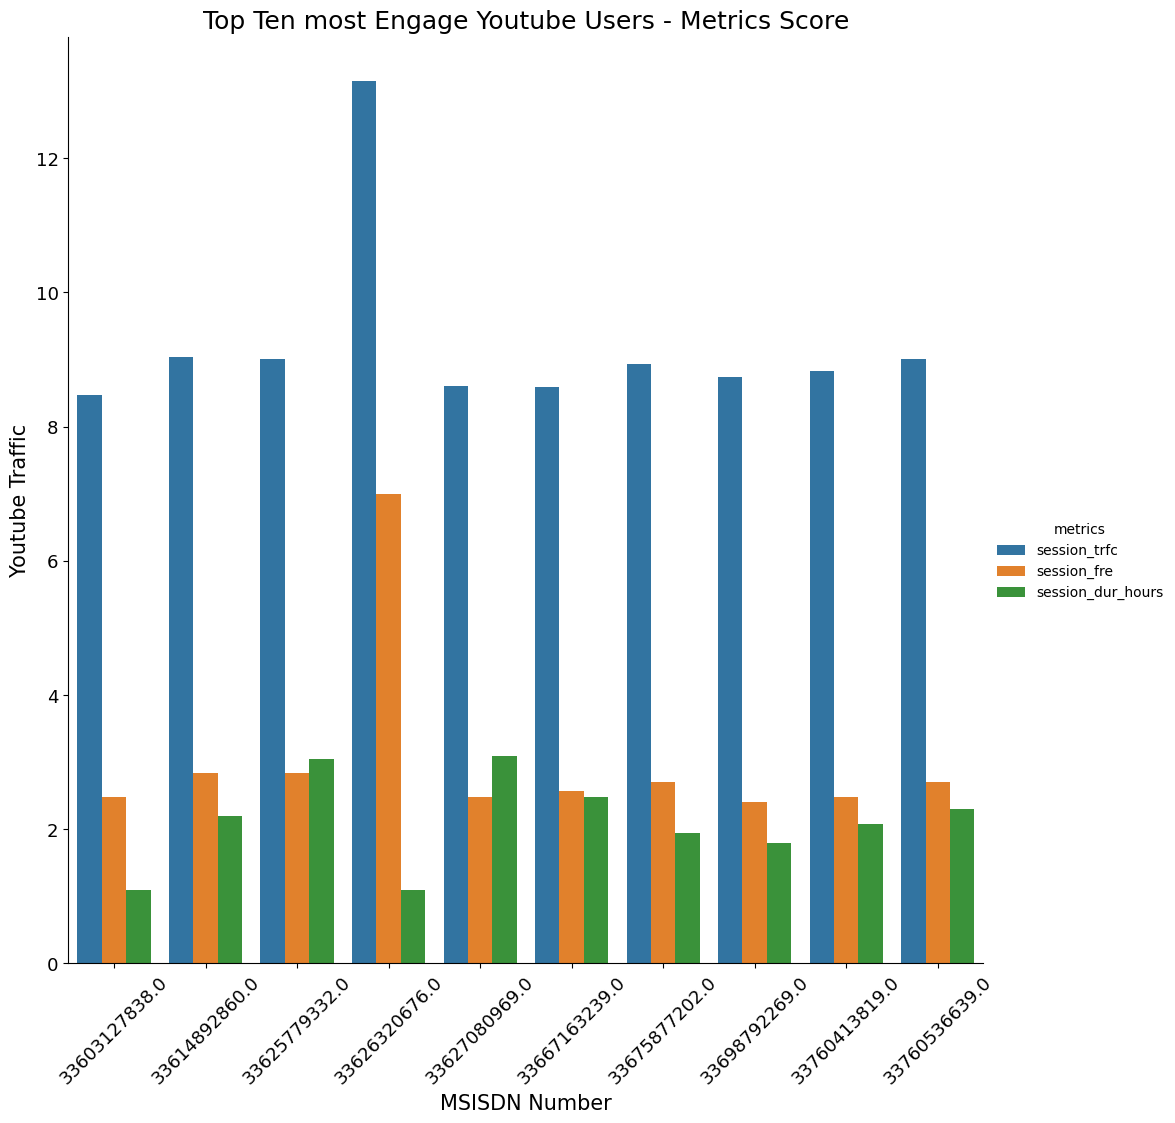

In [144]:
sns.catplot(data=youtube_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar', 
    aspect=1,)
plt.title("Top Ten most Engage Youtube Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Youtube Traffic', fontsize=15)
plt.show()

> From the above, we can observe that there is high session traffic in this application compared to other enagagement metric

**Netflix**

In [145]:
netflix_users = apps.groupby('msisdn_number')['netflix(mb)'].sum().reset_index(name='netflix_traffic')
netflix_users

,msisdn_number,netflix_traffic
0,3.360100e+10,25.9218
1,3.360100e+10,10.7019
2,3.360100e+10,18.4573
3,3.360101e+10,1.8521
4,3.360101e+10,46.9224
...,...,...
106851,3.379000e+10,14.2122
106852,3.379000e+10,8.1359
106853,3.197021e+12,25.3604
106854,3.370000e+14,29.4733


In [146]:
netflix_users = netflix_users.merge(agg_metrics, on='msisdn_number').sort_values(by='netflix_traffic', ascending=False)
netflix_users.head(10)

,msisdn_number,netflix_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,23443.5058,3,1084,514745.0102
37052,3.365973e+10,381.0111,3,16,7348.8834
6437,3.361489e+10,344.6591,9,17,8436.4190
13180,3.362578e+10,340.4432,21,17,8105.8700
92923,3.376054e+10,319.1408,10,15,8120.3212
92577,3.376041e+10,303.5999,8,12,6801.9586
65118,3.366716e+10,299.3962,12,13,5358.1181
76363,3.367588e+10,294.7742,7,15,7525.5495
106137,3.378632e+10,291.7669,5,12,5361.7778
94654,3.376127e+10,278.5600,6,10,4817.1181


In [147]:
top10_netflix_users = netflix_users.head(10)

In [148]:
top10_netflix_users.netflix_traffic = np.log(top10_netflix_users.netflix_traffic)
top10_netflix_users

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1708\3742244934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_netflix_users.netflix_traffic = np.log(top10_netflix_users.netflix_traffic)


,msisdn_number,netflix_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,10.062349,3,1084,514745.0102
37052,3.365973e+10,5.942829,3,16,7348.8834
6437,3.361489e+10,5.842556,9,17,8436.4190
13180,3.362578e+10,5.830248,21,17,8105.8700
92923,3.376054e+10,5.765632,10,15,8120.3212
92577,3.376041e+10,5.715711,8,12,6801.9586
65118,3.366716e+10,5.701768,12,13,5358.1181
76363,3.367588e+10,5.686210,7,15,7525.5495
106137,3.378632e+10,5.675955,5,12,5361.7778
94654,3.376127e+10,5.629633,6,10,4817.1181


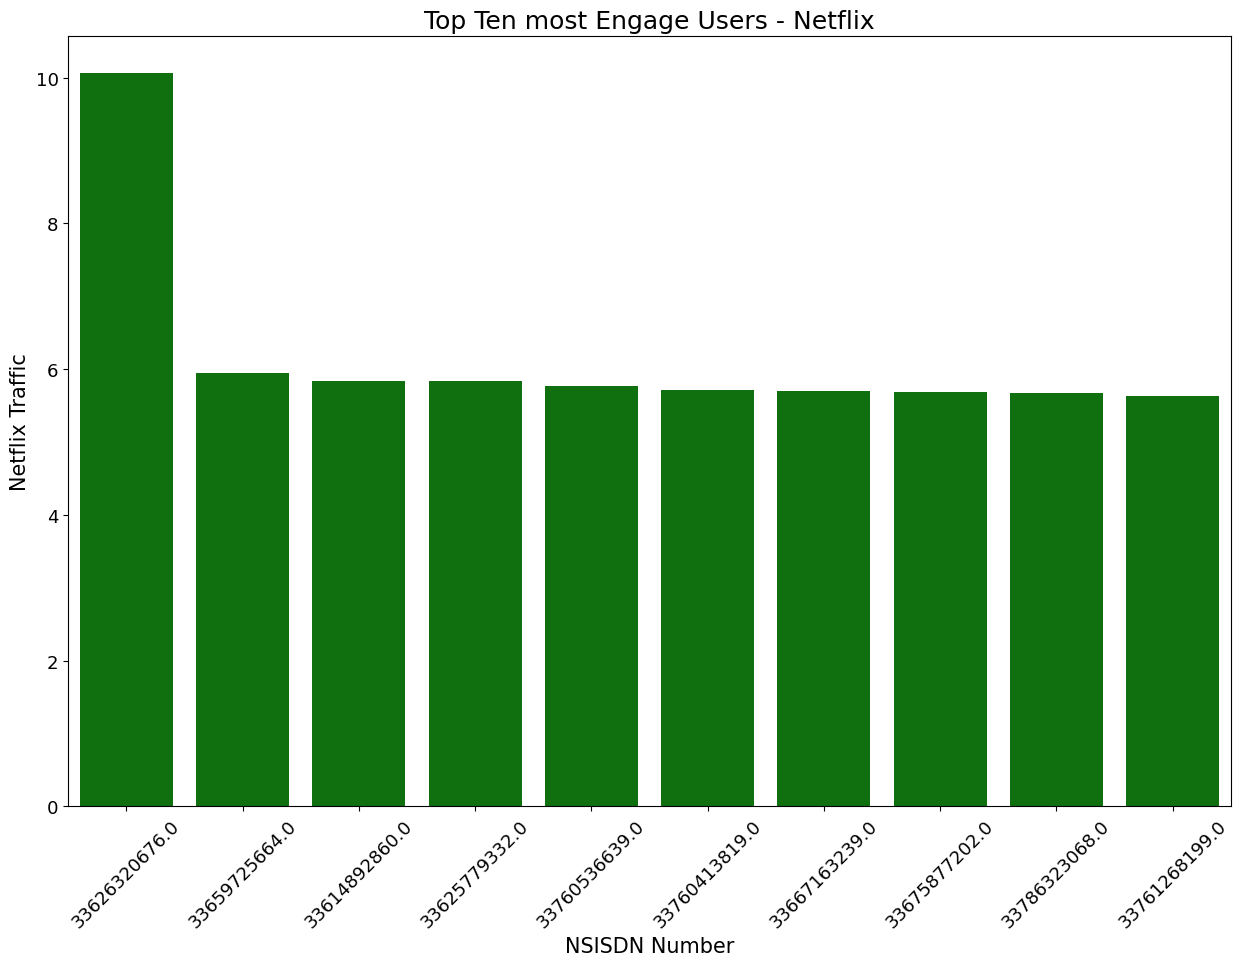

In [149]:

plt.subplots(figsize=(15,10))
sns.barplot(data=top10_netflix_users, x='msisdn_number', y='netflix_traffic', color='g', 
            order=top10_netflix_users.msisdn_number.values.tolist())
plt.title("Top Ten most Engage Users - Netflix", fontsize=18)
plt.xticks(fontsize=13, rotation = 45) 
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Netflix Traffic', fontsize=15)
plt.show()

In [150]:
netflix_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=netflix_users.head(10))
netflix_users

,msisdn_number,netflix_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,23443.5058,3,1084,514745.0102
37052,3.365973e+10,381.0111,3,16,7348.8834
6437,3.361489e+10,344.6591,9,17,8436.4190
13180,3.362578e+10,340.4432,21,17,8105.8700
92923,3.376054e+10,319.1408,10,15,8120.3212
...,...,...,...,...,...
85472,3.369849e+10,0.2710,23,1,436.9229
85616,3.369853e+10,0.2482,23,1,597.9316
66129,3.366749e+10,0.2371,16,1,73.2733
7069,3.361588e+10,0.1922,0,1,802.8124


In [151]:
netflix_agg.value = np.log(netflix_agg.value)
netflix_agg = netflix_agg.sort_values(by='msisdn_number')
netflix_agg.rename(columns={'value':'value(log)'}, inplace=True)


In [152]:
netflix_agg

,msisdn_number,metrics,value(log)
22,3.361489e+10,session_trfc,9.040313
2,3.361489e+10,session_dur_hours,2.197225
12,3.361489e+10,session_fre,2.833213
3,3.362578e+10,session_dur_hours,3.044522
23,3.362578e+10,session_trfc,9.000344
13,3.362578e+10,session_fre,2.833213
0,3.362632e+10,session_dur_hours,1.098612
20,3.362632e+10,session_trfc,13.151427
10,3.362632e+10,session_fre,6.988413
11,3.365973e+10,session_fre,2.772589


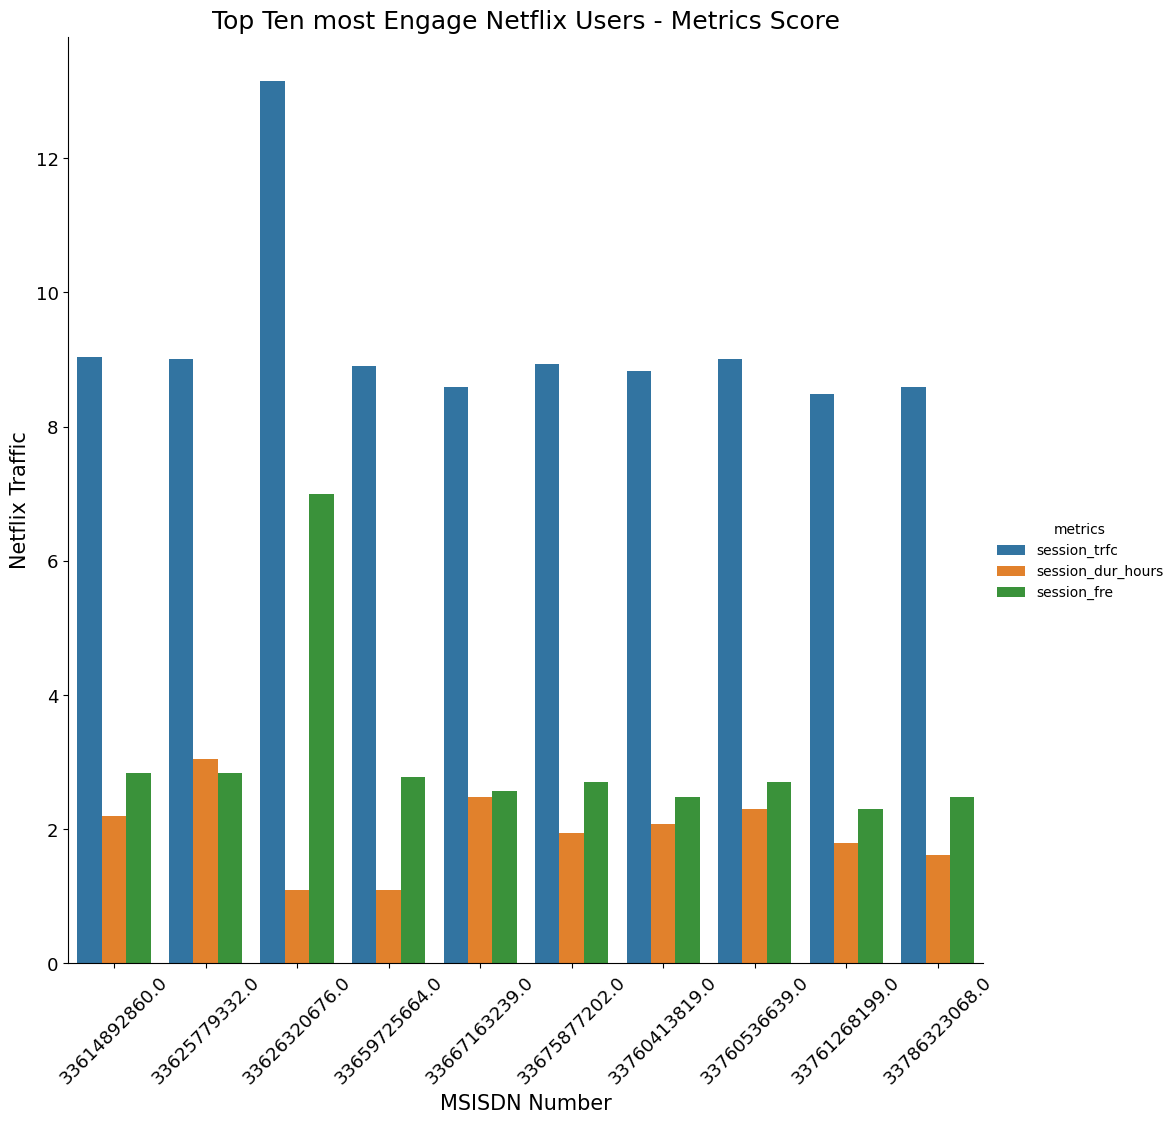

In [153]:
sns.catplot(data=netflix_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar', 
    aspect=1,)
plt.title("Top Ten most Engage Netflix Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Netflix Traffic', fontsize=15)
plt.show()

> From the above, we can observe that there is high session traffic in this application compared to other enagagement metric

**Gaming**

In [154]:
gaming_users = apps.groupby('msisdn_number')['gaming(mb)'].sum().reset_index(name='gaming_traffic')
gaming_users

,msisdn_number,gaming_traffic
0,3.360100e+10,774.8210
1,3.360100e+10,114.2026
2,3.360100e+10,513.8662
3,3.360101e+10,373.0069
4,3.360101e+10,1253.8889
...,...,...
106851,3.379000e+10,629.7697
106852,3.379000e+10,416.7588
106853,3.197021e+12,169.8005
106854,3.370000e+14,486.5100


In [155]:
gaming_users = gaming_users.merge(agg_metrics, on='msisdn_number').sort_values(by='gaming_traffic', ascending=False)
gaming_users.head(10)

,msisdn_number,gaming_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,446668.2450,3,1084,514745.0102
6437,3.361489e+10,7390.4345,9,17,8436.4190
92923,3.376054e+10,7115.4073,10,15,8120.3212
13180,3.362578e+10,6987.2604,21,17,8105.8700
76363,3.367588e+10,6647.6512,7,15,7525.5495
37052,3.365973e+10,6413.9930,3,16,7348.8834
63028,3.366646e+10,6338.4088,10,11,6969.9296
92577,3.376041e+10,5978.2213,8,12,6801.9586
57241,3.366471e+10,5821.0907,18,11,6584.1334
86455,3.369879e+10,5487.1970,6,11,6237.8875


In [156]:
top10_gaming_users = gaming_users.head(10)

In [157]:
top10_gaming_users.gaming_traffic = np.log(top10_gaming_users.gaming_traffic)
top10_gaming_users

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1708\3727878842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_gaming_users.gaming_traffic = np.log(top10_gaming_users.gaming_traffic)


,msisdn_number,gaming_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,13.009571,3,1084,514745.0102
6437,3.361489e+10,8.907942,9,17,8436.4190
92923,3.376054e+10,8.870018,10,15,8120.3212
13180,3.362578e+10,8.851844,21,17,8105.8700
76363,3.367588e+10,8.802019,7,15,7525.5495
37052,3.365973e+10,8.766237,3,16,7348.8834
63028,3.366646e+10,8.754383,10,11,6969.9296
92577,3.376041e+10,8.695878,8,12,6801.9586
57241,3.366471e+10,8.669243,18,11,6584.1334
86455,3.369879e+10,8.610173,6,11,6237.8875


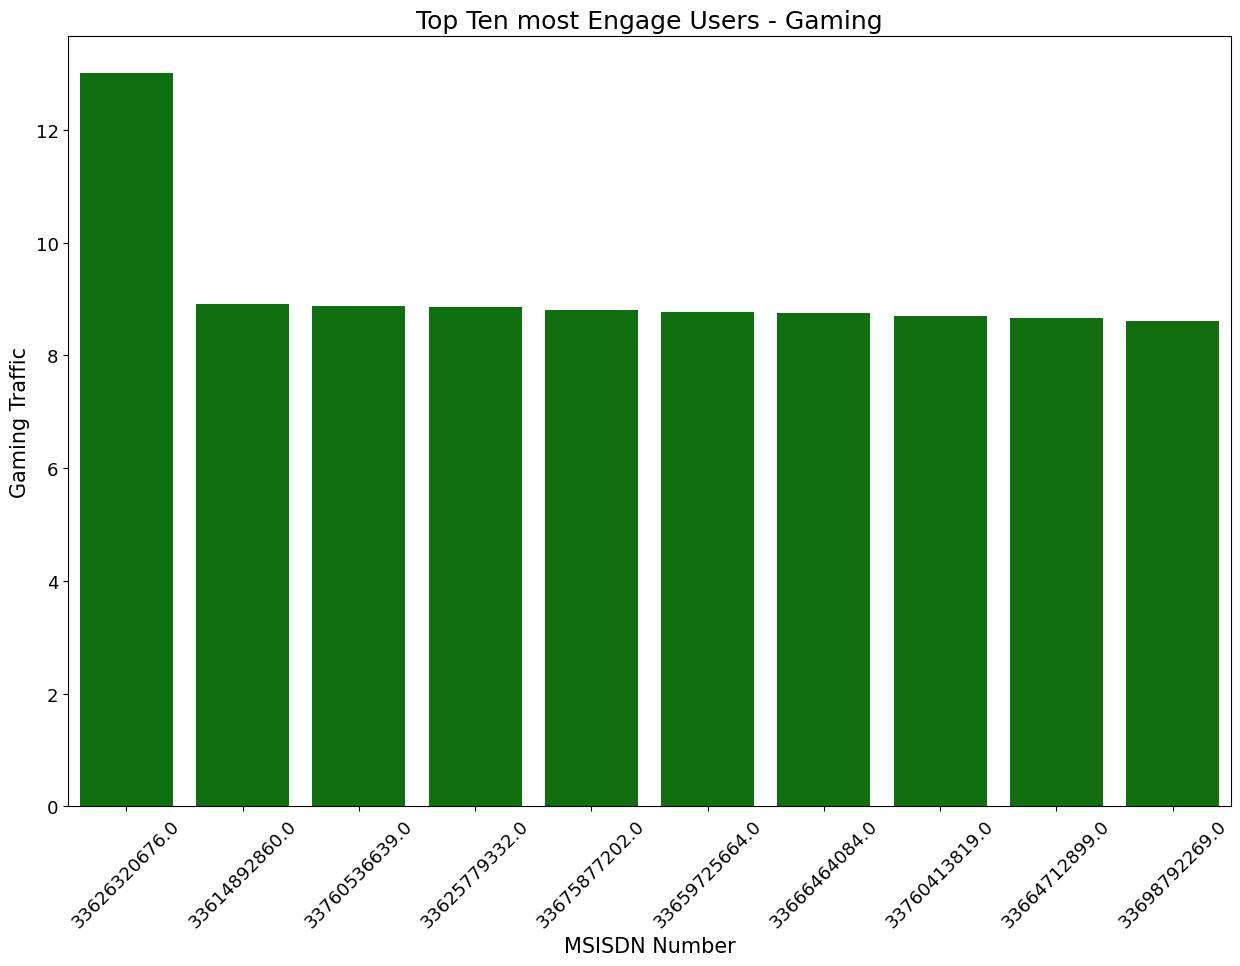

In [158]:
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_gaming_users, x='msisdn_number', y='gaming_traffic', color='g', 
            order=top10_gaming_users.msisdn_number.values.tolist())
plt.title("Top Ten most Engage Users - Gaming", fontsize=18)
plt.xticks(fontsize=13, rotation = 45) 
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Gaming Traffic', fontsize=15)
plt.show()

In [159]:
gaming_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=gaming_users.head(10))
gaming_agg

,msisdn_number,metrics,value
0,3.362632e+10,session_dur_hours,3.0000
1,3.361489e+10,session_dur_hours,9.0000
2,3.376054e+10,session_dur_hours,10.0000
3,3.362578e+10,session_dur_hours,21.0000
4,3.367588e+10,session_dur_hours,7.0000
5,3.365973e+10,session_dur_hours,3.0000
6,3.366646e+10,session_dur_hours,10.0000
7,3.376041e+10,session_dur_hours,8.0000
8,3.366471e+10,session_dur_hours,18.0000
9,3.369879e+10,session_dur_hours,6.0000


In [160]:
gaming_agg.value = np.log(gaming_agg.value)
gaming_agg = gaming_agg.sort_values(by='msisdn_number')
gaming_agg.rename(columns={'value':'value(log)'}, inplace=True)
gaming_agg

,msisdn_number,metrics,value(log)
1,3.361489e+10,session_dur_hours,2.197225
21,3.361489e+10,session_trfc,9.040313
11,3.361489e+10,session_fre,2.833213
23,3.362578e+10,session_trfc,9.000344
13,3.362578e+10,session_fre,2.833213
3,3.362578e+10,session_dur_hours,3.044522
10,3.362632e+10,session_fre,6.988413
20,3.362632e+10,session_trfc,13.151427
0,3.362632e+10,session_dur_hours,1.098612
5,3.365973e+10,session_dur_hours,1.098612


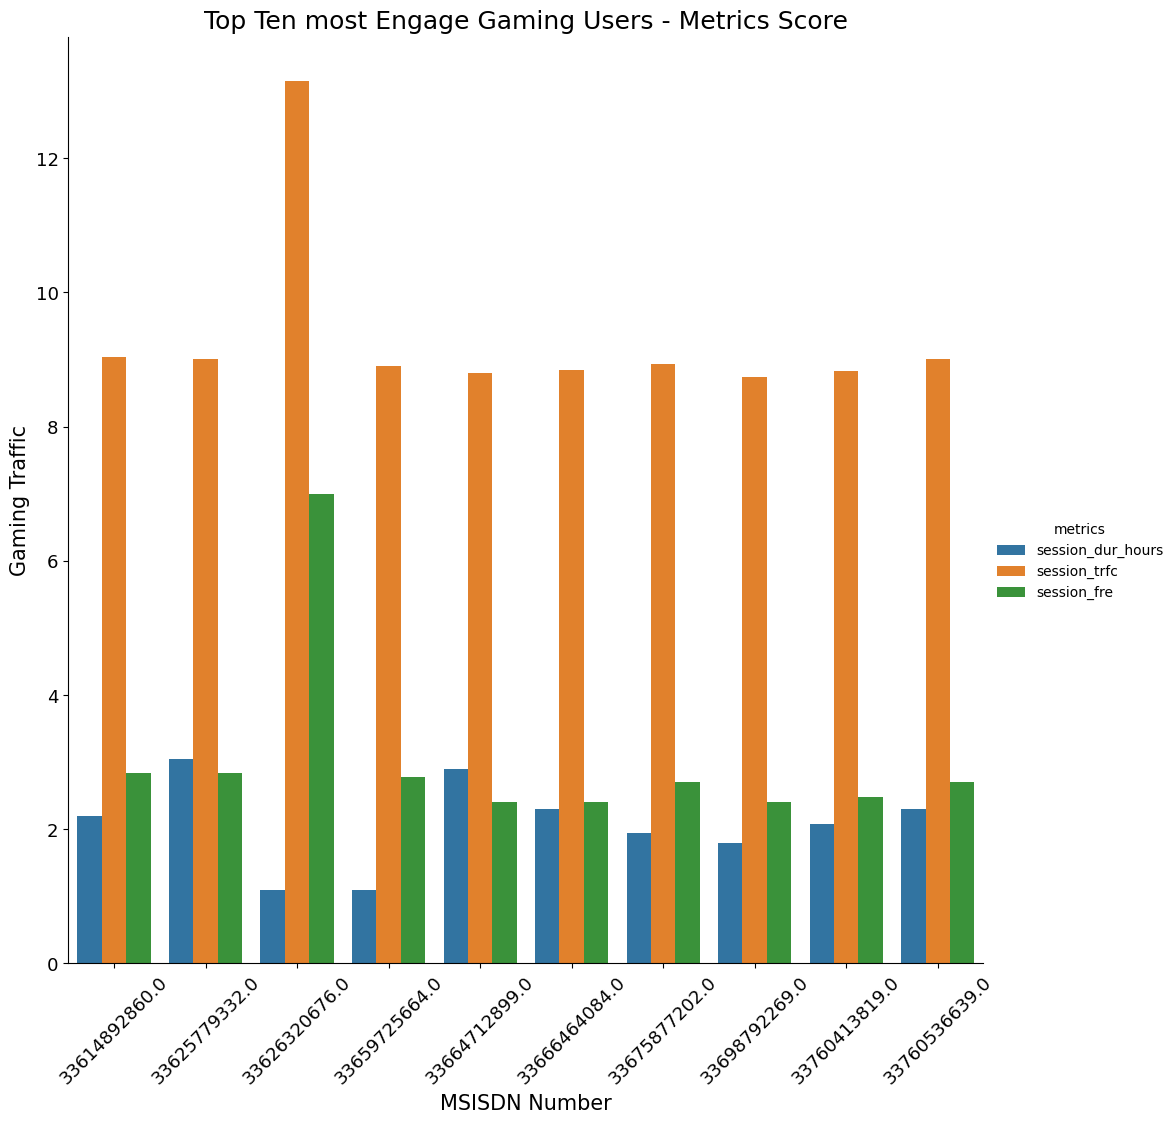

In [161]:
sns.catplot(data=gaming_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar', 
    aspect=1,)
plt.title("Top Ten most Engage Gaming Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Gaming Traffic', fontsize=15)
plt.show()

> From the above, we can observe that there is high session traffic in this application compared to other enagagement metric

> Other Applications

In [101]:
other_users = apps.groupby('msisdn_number')['other(mb)'].sum().reset_index(name='other_traffic')
other_users

,msisdn_number,other_traffic
0,3.360100e+10,368.6627
1,3.360100e+10,268.6597
2,3.360100e+10,478.4524
3,3.360101e+10,33.6453
4,3.360101e+10,767.5214
...,...,...
106851,3.379000e+10,281.6036
106852,3.379000e+10,201.3351
106853,3.197021e+12,448.7290
106854,3.370000e+14,142.2772


In [ ]:
> merge aggregation metrics


In [103]:
other_users = other_users.merge(agg_metrics, on='msisdn_number').sort_values(by='other_traffic', ascending=False)

In [104]:
other_users

,msisdn_number,other_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,437876.0044,3,1084,514745.0102
6437,3.361489e+10,7285.3694,9,17,8436.4190
76363,3.367588e+10,6483.5695,7,15,7525.5495
13180,3.362578e+10,6060.2024,21,17,8105.8700
666,3.360313e+10,6033.5836,3,12,4745.6694
...,...,...,...,...,...
52990,3.366354e+10,1.0777,6,1,849.5036
13330,3.362603e+10,1.0756,5,1,848.1915
95572,3.376159e+10,0.9277,16,1,488.8326
17285,3.363359e+10,0.4881,3,1,116.9760


In [106]:
top10_other_users = other_users.head(10)
top10_other_users

,msisdn_number,other_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,437876.0044,3,1084,514745.0102
6437,3.361489e+10,7285.3694,9,17,8436.4190
76363,3.367588e+10,6483.5695,7,15,7525.5495
13180,3.362578e+10,6060.2024,21,17,8105.8700
666,3.360313e+10,6033.5836,3,12,4745.6694
37052,3.365973e+10,6024.7567,3,16,7348.8834
13936,3.362695e+10,5059.6694,6,10,4602.0874
13994,3.362708e+10,4880.7055,22,12,5488.1390
94654,3.376127e+10,4842.5479,6,10,4817.1181
30715,3.365836e+10,4781.3902,5,10,6153.4861


> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten other aplication users, I wil log(normalise) the other applications traffic

In [108]:
top10_other_users.other_traffic = np.log(top10_other_users.other_traffic)
top10_other_users

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1708\1680785404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_other_users.other_traffic = np.log(top10_other_users.other_traffic)


,msisdn_number,other_traffic,session_dur_hours,session_fre,session_trfc
13526,3.362632e+10,12.989691,3,1084,514745.0102
6437,3.361489e+10,8.893623,9,17,8436.4190
76363,3.367588e+10,8.777026,7,15,7525.5495
13180,3.362578e+10,8.709498,21,17,8105.8700
666,3.360313e+10,8.705096,3,12,4745.6694
37052,3.365973e+10,8.703632,3,16,7348.8834
13936,3.362695e+10,8.529056,6,10,4602.0874
13994,3.362708e+10,8.493045,22,12,5488.1390
94654,3.376127e+10,8.485196,6,10,4817.1181
30715,3.365836e+10,8.472487,5,10,6153.4861


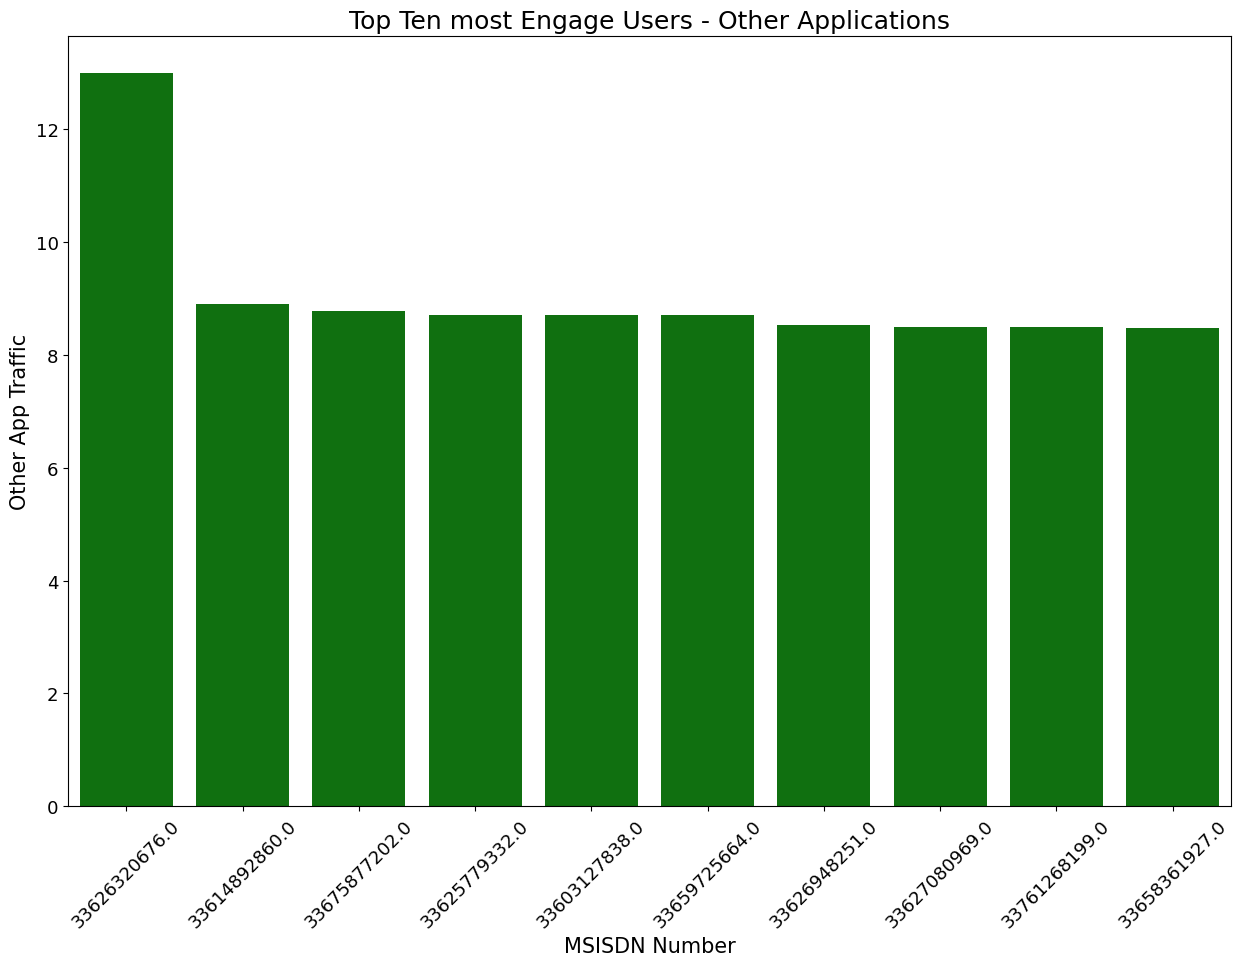

In [109]:
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_other_users, x='msisdn_number', y='other_traffic', color='g', 
            order=top10_other_users.msisdn_number.values.tolist())
plt.title("Top Ten most Engage Users - Other Applications", fontsize=18)
plt.xticks(fontsize=13, rotation = 45) 
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Other App Traffic', fontsize=15)
plt.show()

In [110]:
other_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=other_users.head(10))
other_agg

,msisdn_number,metrics,value
0,3.362632e+10,session_dur_hours,3.0000
1,3.361489e+10,session_dur_hours,9.0000
2,3.367588e+10,session_dur_hours,7.0000
3,3.362578e+10,session_dur_hours,21.0000
4,3.360313e+10,session_dur_hours,3.0000
5,3.365973e+10,session_dur_hours,3.0000
6,3.362695e+10,session_dur_hours,6.0000
7,3.362708e+10,session_dur_hours,22.0000
8,3.376127e+10,session_dur_hours,6.0000
9,3.365836e+10,session_dur_hours,5.0000


> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten other application users enagagement, I wil log(normalise) the value figures

In [111]:
other_agg.value = np.log(other_agg.value)
other_agg = other_agg.sort_values(by='msisdn_number')
other_agg.rename(columns={'value':'value(log)'}, inplace=True)
other_agg


,msisdn_number,metrics,value(log)
14,3.360313e+10,session_fre,2.484907
24,3.360313e+10,session_trfc,8.464988
4,3.360313e+10,session_dur_hours,1.098612
1,3.361489e+10,session_dur_hours,2.197225
21,3.361489e+10,session_trfc,9.040313
11,3.361489e+10,session_fre,2.833213
3,3.362578e+10,session_dur_hours,3.044522
23,3.362578e+10,session_trfc,9.000344
13,3.362578e+10,session_fre,2.833213
20,3.362632e+10,session_trfc,13.151427


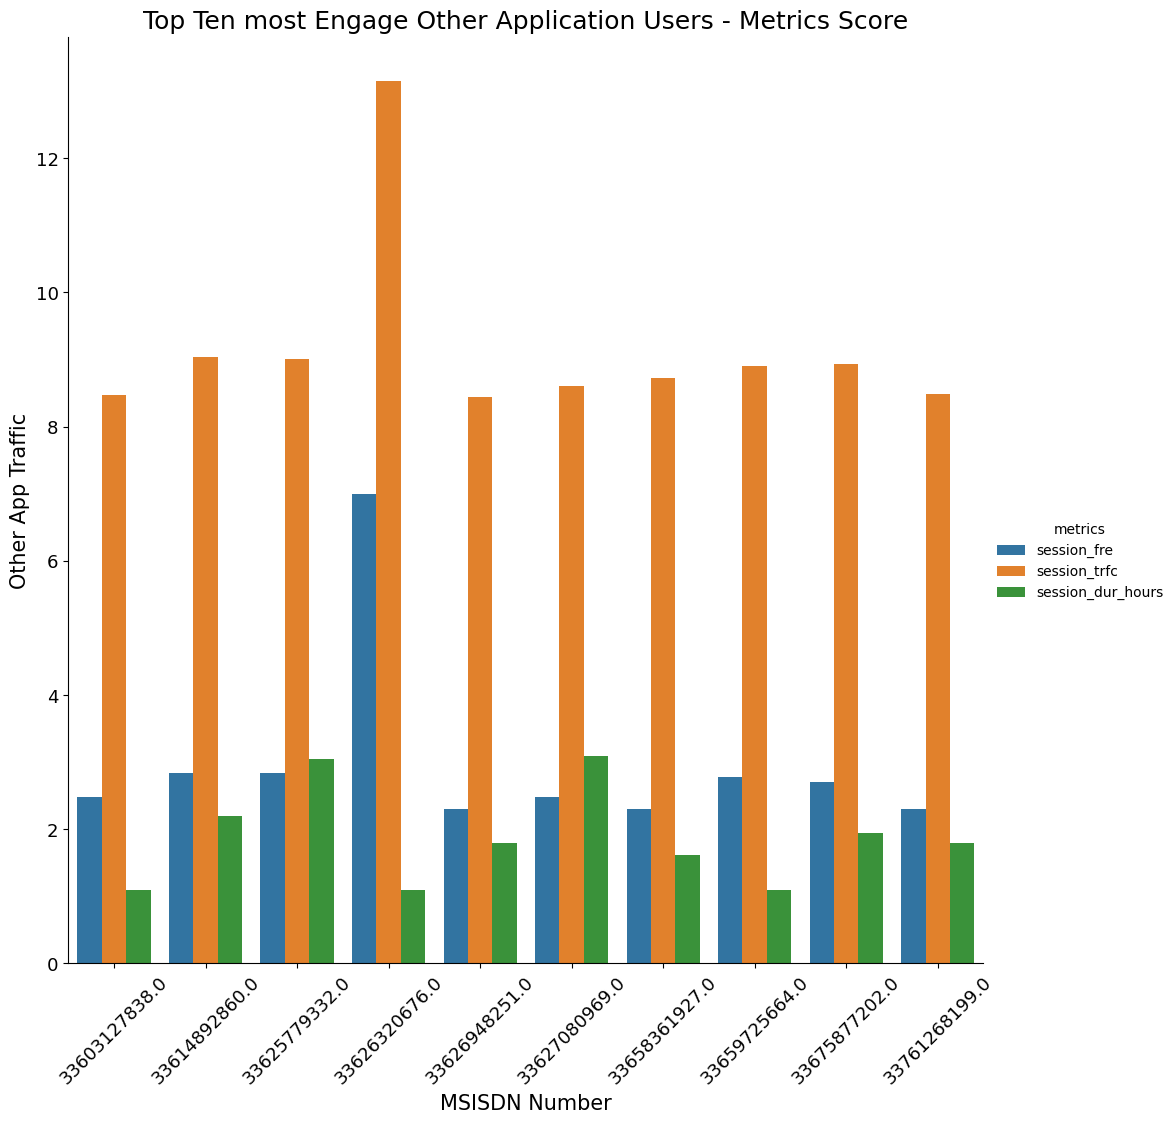

In [112]:
sns.catplot(data=other_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar', 
    aspect=1,)
plt.title("Top Ten most Engage Other Application Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Other App Traffic', fontsize=15)
plt.show()

> From the above, we can observe that there is high session traffic in this application compared to other enagagement metric

> We might also be interested in knowning who are the top ten customeres of these applications across board

> We would do this by findin the intersecion between these users

In [162]:
email_top10Set = set(top10_email_users.msisdn_number.tolist())

gaming_top10Set = set(top10_gaming_users.msisdn_number.tolist())

google_top10Set = set(top10_google_users.msisdn_number.tolist())

other_top10Set = set(top10_other_users.msisdn_number.tolist())

social_top10Set = set(top10_socialMedia_users.msisdn_number.tolist())

netflix_top10Set = set(top10_netflix_users.msisdn_number.tolist())

youtube_top10Set = set(top10_youtube_users.msisdn_number.tolist())

In [163]:
topAppUsers = set.intersection(email_top10Set, gaming_top10Set, google_top10Set,
                 other_top10Set, social_top10Set, netflix_top10Set, youtube_top10Set)

In [164]:
topAppUsers

{33614892860.0, 33625779332.0, 33626320676.0}

In [ ]:
#### THese are the MSISDN numbers of the top  enagaged users on all Applications

 1. '33614892860' 
 2. '33625779332'
 3. '33626320676'


# Plotting top-3 most used application

In [165]:
apps

,bearer_id,msisdn_number,social_media(mb),google(mb),email(mb),youtube(mb),netflix(mb),gaming(mb),other(mb),total_traffic(mb),duration (hrs)
0,13114483460844900352,33664962239.0,1.4974,2.7713,3.5298,17.5056,17.0280,278.8796,172.1943,329.6179,99.7630
1,13114483482878900224,33681854413.0,1.8437,4.2096,0.8940,37.5358,33.9179,581.6658,516.8527,674.4245,99.7630
2,13114483484080500736,33760627129.0,1.6463,9.7552,3.2073,32.8305,22.6509,219.3263,395.6874,293.4370,99.7630
3,13114483485442799616,33750343200.0,0.6270,11.2646,1.9750,34.8423,14.3934,772.8461,726.5446,848.1529,99.7630
4,13114483499480700928,33699795932.0,0.8705,7.3899,2.0126,32.6369,16.7273,506.6271,538.4634,579.5301,99.7630
...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,33650688697.0,3.3541,12.1926,0.6589,26.6601,35.8218,510.9853,15.9759,602.5354,77.4677
149997,7349883264234609664,33663449963.0,2.2432,4.2108,2.0234,21.1387,38.7605,602.3675,681.5320,673.0880,93.4321
149998,13114483573367300096,33621890103.0,1.2019,6.2804,1.9629,23.3807,14.3334,540.6702,126.2813,598.6201,93.6981
149999,13114483573367300096,33619622058.0,0.7850,7.3979,2.7188,16.3293,15.7307,338.6178,778.3127,382.9212,93.3749


In [166]:
topApps = apps[['social_media(mb)','google(mb)','email(mb)','youtube(mb)','netflix(mb)','gaming(mb)','other(mb)']]
topApps

,social_media(mb),google(mb),email(mb),youtube(mb),netflix(mb),gaming(mb),other(mb)
0,1.4974,2.7713,3.5298,17.5056,17.0280,278.8796,172.1943
1,1.8437,4.2096,0.8940,37.5358,33.9179,581.6658,516.8527
2,1.6463,9.7552,3.2073,32.8305,22.6509,219.3263,395.6874
3,0.6270,11.2646,1.9750,34.8423,14.3934,772.8461,726.5446
4,0.8705,7.3899,2.0126,32.6369,16.7273,506.6271,538.4634
...,...,...,...,...,...,...,...
149996,3.3541,12.1926,0.6589,26.6601,35.8218,510.9853,15.9759
149997,2.2432,4.2108,2.0234,21.1387,38.7605,602.3675,681.5320
149998,1.2019,6.2804,1.9629,23.3807,14.3334,540.6702,126.2813
149999,0.7850,7.3979,2.7188,16.3293,15.7307,338.6178,778.3127


In [167]:
topAppsAgg = topApps.aggregate(['sum', 'mean'])
topAppsAgg

,social_media(mb),google(mb),email(mb),youtube(mb),netflix(mb),gaming(mb),other(mb)
sum,261535.036400,1.116850e+06,323169.322700,3.239198e+06,3.237070e+06,6.156005e+07,6.142161e+07
mean,1.743555,7.445616e+00,2.154448,2.159451e+01,2.158032e+01,4.103976e+02,4.094747e+02


> For efficient reporting, we would log normalise these values

In [168]:
topAppsAggLog = topAppsAgg.apply(lambda x: np.log(x))

In [169]:
topAppsAggLog=topAppsAggLog.transpose().sort_values(by=['sum', 'mean'], ascending=False).head(3)

In [170]:
topAppsAggLog

,sum,mean
gaming(mb),17.935524,6.017127
other(mb),17.933272,6.014875
youtube(mb),14.990836,3.072439


In [171]:
topAppsAggLog.rename(columns={'index':'apps'}, inplace=True)

In [172]:
topAppsAggLog

,sum,mean
gaming(mb),17.935524,6.017127
other(mb),17.933272,6.014875
youtube(mb),14.990836,3.072439


<Figure size 5000x6000 with 0 Axes>

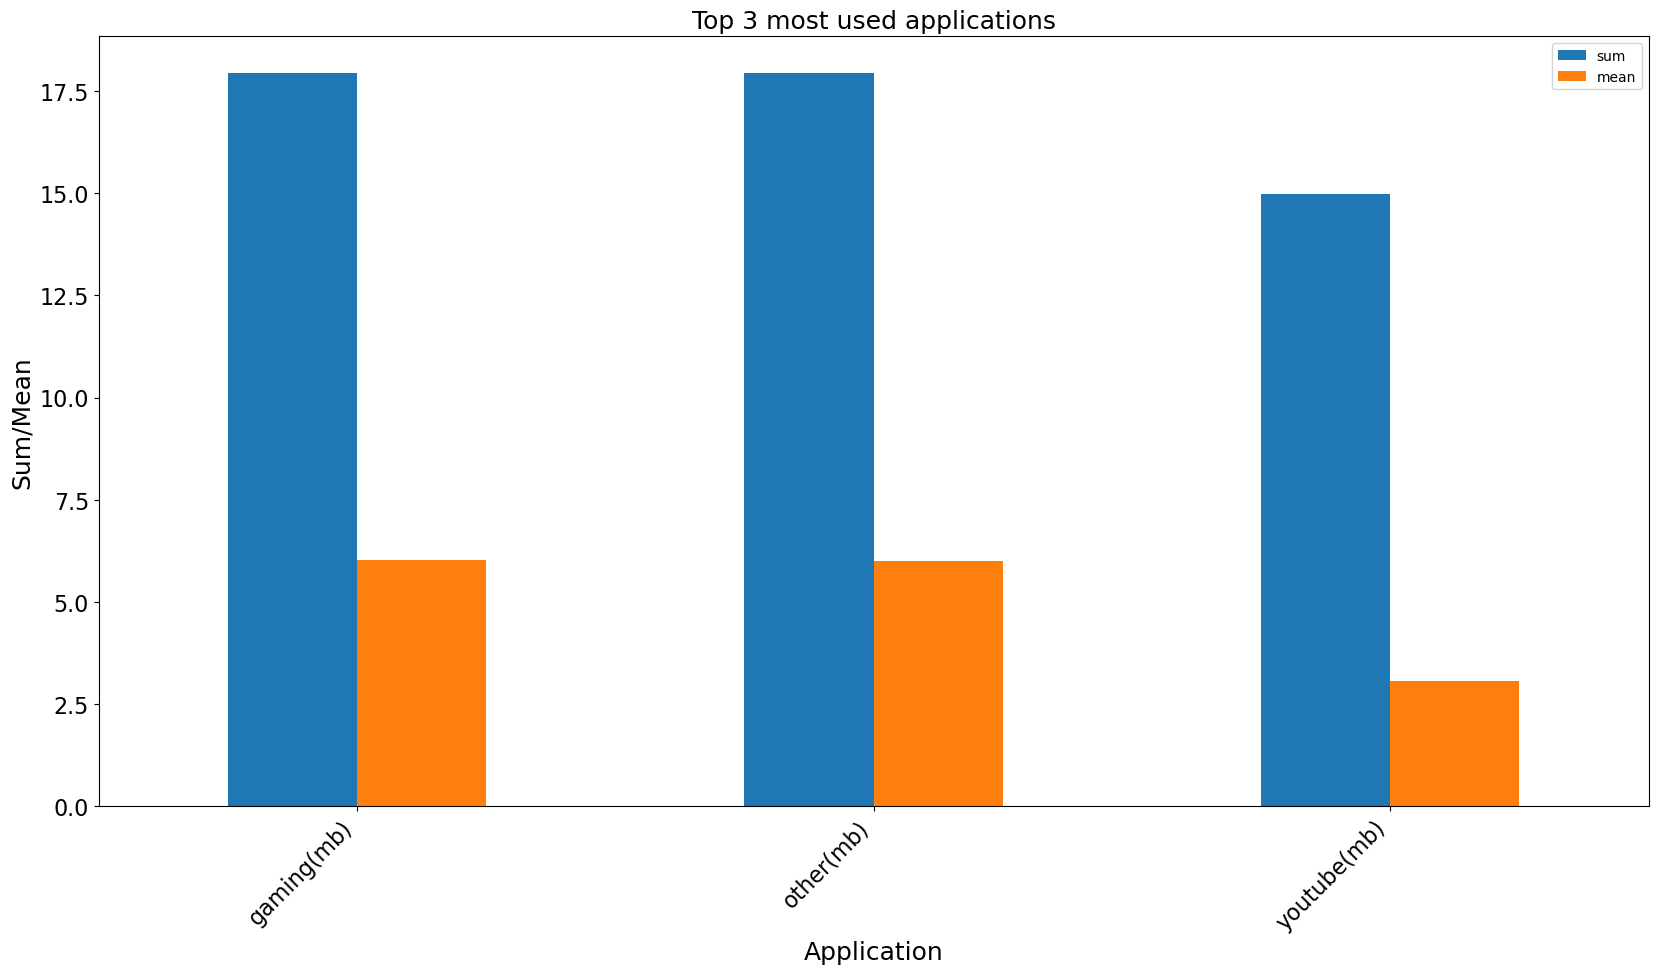

In [173]:
plt.figure(figsize=(50,60))
# topAppsAggLog.plot(figsize=(5,5));
ax= topAppsAggLog.plot.bar(figsize=(20,10))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0, 
    horizontalalignment='right'
)
plt.title("Top 3 most used applications", fontsize=18)
plt.xticks(fontsize=16, rotation = 45)
plt.yticks(fontsize=16)
plt.xlabel('Application', fontsize=18)
plt.ylabel('Sum/Mean', fontsize=18)
plt.show()

# ●	Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement. 

In [29]:
data.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'imsi',
       'msisdn_number', 'imei', 'last_location_name', 'avg_rtt_dl__ms_',
       'avg_rtt_ul__ms_', 'avg_bearer_tp_dl__kbps_', 'avg_bearer_tp_ul__kbps_',
       'tcp_dl_retrans__vol__bytes_', 'tcp_ul_retrans__vol__bytes_',
       'dl_tp_<_50_kbps__%_', '50_kbps_<_dl_tp_<_250_kbps__%_',
       '250_kbps_<_dl_tp_<_1_mbps__%_', 'dl_tp_>_1_mbps__%_',
       'ul_tp_<_10_kbps__%_', '10_kbps_<_ul_tp_<_50_kbps__%_',
       '50_kbps_<_ul_tp_<_300_kbps__%_', 'ul_tp_>_300_kbps__%_',
       'http_dl__bytes_', 'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'dur___ms__1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       'nb_of

In [30]:
aggregated_metrics.columns

Index(['session_dur_hr', 'session_frequency', 'session_trfc_mb'], dtype='object')

In [31]:
km = KMeans(n_clusters=3, random_state=0)
km

KMeans(n_clusters=3, random_state=0)

In [32]:
agg_metrics=  sess_dur.merge(session_frequency,on='msisdn_number').merge(session_trfc, on='msisdn_number')
norm_metrics = agg_metrics[['session_dur_hr','session_frequency','session_trfc_mb']]

In [33]:
scaler = MinMaxScaler()

scaled_metrics = scaler.fit_transform(norm_metrics)
scaled_metrics


array([[1.30434783e-01, 1.00000000e+00, 1.00000000e+00],
       [1.30434783e-01, 1.38504155e-02, 1.42160202e-02],
       [3.91304348e-01, 1.47737765e-02, 1.63289160e-02],
       ...,
       [4.34782609e-02, 0.00000000e+00, 4.56824540e-04],
       [4.34782609e-02, 0.00000000e+00, 1.19557019e-03],
       [4.34782609e-02, 0.00000000e+00, 9.72892910e-04]])

# Verify minimum & maximum value of all features

In [34]:
scaled_metrics.min()

0.0

In [35]:
scaled_metrics.max()

1.0

In [36]:
km.fit(scaled_metrics)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [37]:
# centroid values 

metrics_cluster = km.cluster_centers_
metrics_cluster

array([[5.11675296e-01, 3.57454259e-04, 1.21202307e-03],
       [1.49769135e-01, 3.32093431e-04, 1.18688715e-03],
       [9.24648999e-01, 4.34480424e-04, 1.29018497e-03]])

In [38]:
eng_centroids = pd.DataFrame(metrics_cluster)
eng_centroids

,0,1,2
0,0.511675,0.000357,0.001212
1,0.149769,0.000332,0.001187
2,0.924649,0.000434,0.001290


In [39]:
eng_centroids.to_csv('engagement_centroids.csv')

#  Labels

- assign labels to users

In [40]:
set(km.labels_.tolist())

{0, 1, 2}

In [41]:
norm_metrics['clusters'] = km.labels_

In [42]:
norm_metrics


,session_dur_hr,session_frequency,session_trfc_mb,clusters
0,3,1084,514745.010179,1
1,3,16,7348.883422,1
2,9,17,8436.419004,0
3,7,15,7525.549515,1
4,21,17,8105.869982,2
...,...,...,...,...
106851,2,1,199.216558,1
106852,2,1,797.900773,1
106853,1,1,266.842393,1
106854,1,1,647.084608,1


In [43]:
agg_metrics = sess_dur.merge(session_frequency,on='msisdn_number').merge(session_trfc, on='msisdn_number')
agg_metrics

,msisdn_number,session_dur_hr,session_frequency,session_trfc_mb
0,3.362632e+10,3,1084,514745.010179
1,3.365973e+10,3,16,7348.883422
2,3.361489e+10,9,17,8436.419004
3,3.367588e+10,7,15,7525.549515
4,3.362578e+10,21,17,8105.869982
...,...,...,...,...
106851,3.365043e+10,2,1,199.216558
106852,3.369839e+10,2,1,797.900773
106853,3.365933e+10,1,1,266.842393
106854,3.366566e+10,1,1,647.084608


In [44]:
engagement_cluster = norm_metrics.merge(agg_metrics.msisdn_number, 
                                        left_index=True, right_index=True)

In [45]:
engagement_cluster.rename(columns={'msisdn_number':'users'}, inplace=True)
engagement_cluster

,session_dur_hr,session_frequency,session_trfc_mb,clusters,users
0,3,1084,514745.010179,1,3.362632e+10
1,3,16,7348.883422,1,3.365973e+10
2,9,17,8436.419004,0,3.361489e+10
3,7,15,7525.549515,1,3.367588e+10
4,21,17,8105.869982,2,3.362578e+10
...,...,...,...,...,...
106851,2,1,199.216558,1,3.365043e+10
106852,2,1,797.900773,1,3.369839e+10
106853,1,1,266.842393,1,3.365933e+10
106854,1,1,647.084608,1,3.366566e+10


In [46]:
engagement_cluster.to_csv('engagement_cluster.csv')

# Compute the minimum, maximum, average & total non-normalized metrics for each cluster.                        

         - 

In [47]:
session_dur = norm_metrics.groupby('clusters')['session_dur_hr'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)

In [48]:
session_dur = session_dur.apply(lambda x: np.log(x)).sort_values(by='sum', ascending=False)
session_dur


C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,min,max,mean,sum
2,2.833213,3.135494,3.057153,13.508039
0,2.079442,2.772589,2.465429,12.839733
1,-inf,1.945910,1.236834,11.839823


<Figure size 3000x4000 with 0 Axes>

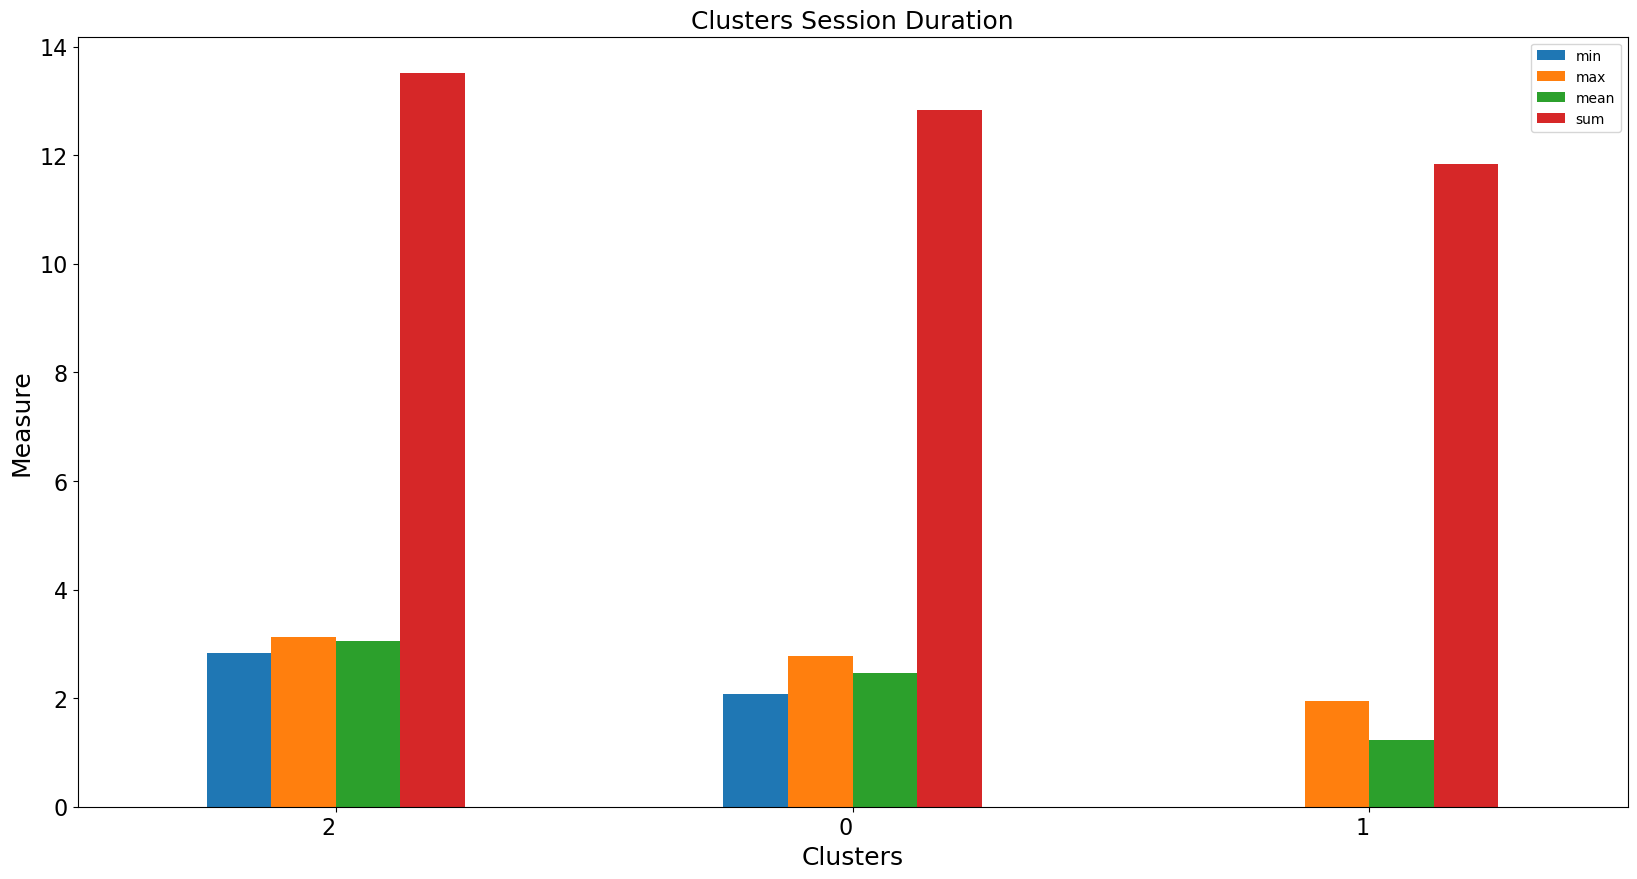

In [49]:
plt.figure(figsize=(30,40))
# topAppsAggLog.plot(figsize=(5,5));
ax= session_dur.plot.bar(figsize=(20,10))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0, 
    horizontalalignment='right'
)
plt.title("Clusters Session Duration", fontsize=18)
plt.xticks(fontsize=16, rotation =0)
plt.yticks(fontsize=16) 
plt.xlabel('Clusters', fontsize=18)
plt.ylabel('Measure', fontsize=18)
plt.show()

 > Customers in cluster 2 have better engagement in session duration on average than others while customer in cluster 1 have the lowest
 > ALso customers with low engagement falls under cluster-2

# Session Frequency

In [50]:
session_frq = norm_metrics.groupby('clusters')['session_frequency'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)

In [51]:
session_frq = session_frq.apply(lambda x: np.log(x)).sort_values(by='sum', ascending=False)

In [52]:
session_frq


,min,max,mean,sum
1,0.0,6.988413,0.307233,10.910222
2,0.0,2.833213,0.385631,10.836517
0,0.0,2.833213,0.327232,10.701535



> Customers in cluster 2 have better engagement in session frequency on average than others while customer in cluster 1 have the lowest

 > However, customers in cluster 2 have the maximum number of session frequency

# Total Session Traffic

In [53]:
session_trfc = norm_metrics.groupby('clusters')['session_trfc_mb'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)
session_trfc = session_trfc.apply(lambda x: np.log(x)).sort_values(by='sum', ascending=False)
session_trfc


,min,max,mean,sum
1,3.478916,13.151427,6.465546,17.068536
2,3.466374,9.000344,6.545039,16.995926
0,3.456592,9.040313,6.485479,16.859783


> Customers in cluster 2 have better engagement in total session traffic on average than others while customer in cluster 1 have the lowest

> Also cluster 1 has the maximum number of total session traffic - This is a trend with cluster 2

In [54]:
# using elbow method to find the optimised value of k

In [55]:
scaled_metrics

array([[1.30434783e-01, 1.00000000e+00, 1.00000000e+00],
       [1.30434783e-01, 1.38504155e-02, 1.42160202e-02],
       [3.91304348e-01, 1.47737765e-02, 1.63289160e-02],
       ...,
       [4.34782609e-02, 0.00000000e+00, 4.56824540e-04],
       [4.34782609e-02, 0.00000000e+00, 1.19557019e-03],
       [4.34782609e-02, 0.00000000e+00, 9.72892910e-04]])

In [56]:
Sum_of_squared_distances = []
K = range(1,26)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_metrics)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

In [57]:
Sum_of_squared_distances

[12282.170960991505,
 2637.0869182880897,
 1113.8435512474744,
 606.1212545394865,
 362.6335780618577,
 242.7335619482929,
 176.1367294221189,
 133.3046113653582,
 102.66811427814251,
 80.03538896667887,
 63.080365802168856,
 47.27137619835972,
 46.184732756854714,
 38.26581477778611,
 32.74639566667876,
 28.793961044279534,
 23.888857714015593,
 20.285552404716253,
 16.586120308310786,
 13.370864535566465,
 10.285131172962451,
 7.303158037197288,
 4.595671091147482,
 2.142927702989566,
 0.14612959893568261]

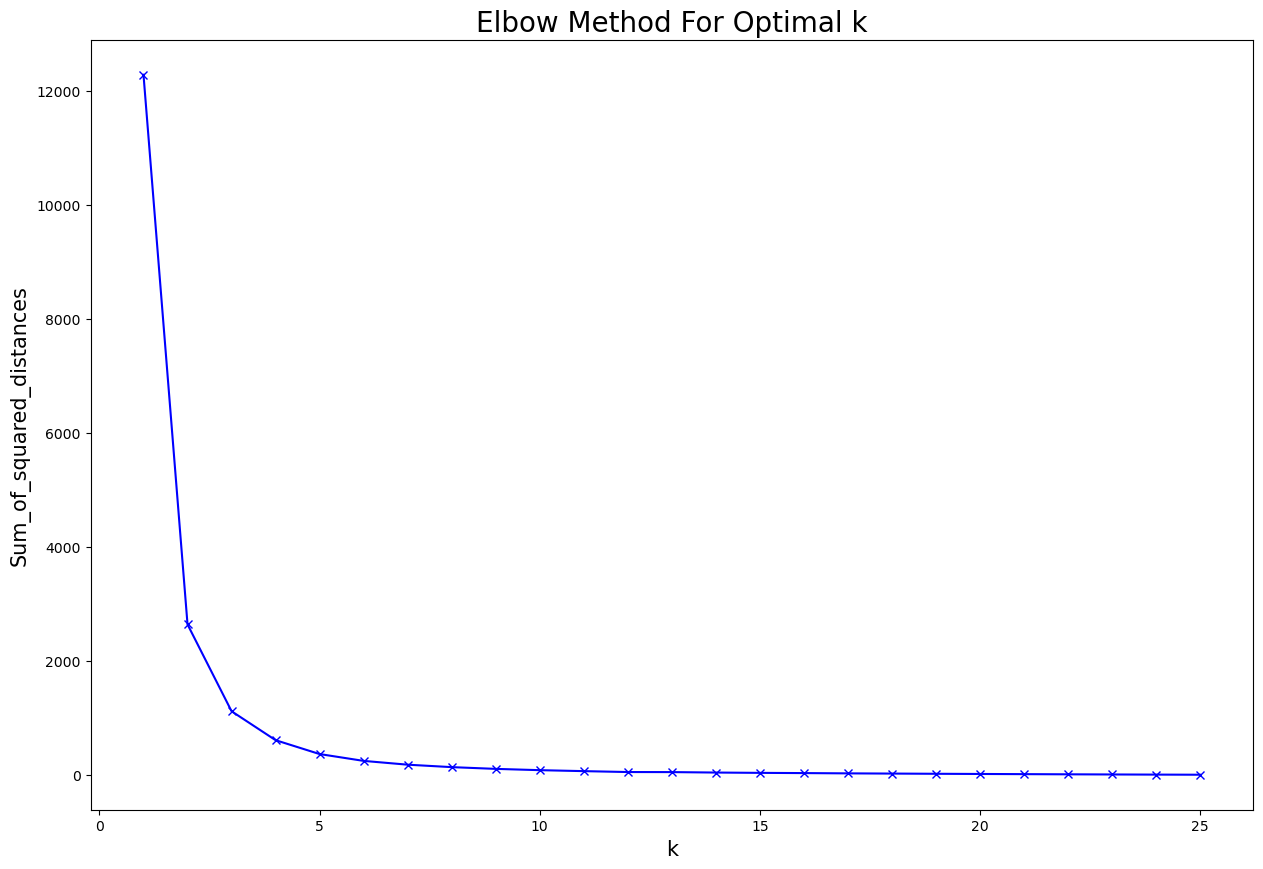

In [58]:
plt.subplots(figsize=(15, 10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k', fontsize=15)
plt.ylabel('Sum_of_squared_distances', fontsize=15)
plt.title('Elbow Method For Optimal k', fontsize=20)
plt.show()

**In the plot above the elbow is at k=3 indicating the optimal k for this dataset is 3**